- This notebook runs cell cell interaction using liana packages
- cell types included MSC, leukemic cells, and normal hematopoietic cells
- sample time points


# import package

In [2]:
library(tidyverse)
library(liana)
library(sceasy)
library(data.table, quietly = TRUE)
library(dplyr, quietly = TRUE)
library(ggplot2, quietly = TRUE)
library(gridExtra, quietly = TRUE)
library(tidyverse, quietly = TRUE)
library(SingleCellExperiment, quietly = TRUE)
library(reticulate, quietly = TRUE)
library(magrittr, quietly = TRUE)
library(liana, quietly = TRUE)
library(ExperimentHub, quietly = TRUE)
library(ggpubr)
library(ComplexHeatmap)
library(Seurat)
library(DT)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(liana): there is no package called ‘liana’


In [2]:
base_dir = '/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_JinWang/'

source('~/script/utils.r')

setwd(base_dir)


# import design table

In [4]:
design = fread('data/dsn_dt_base_v4.tsv')
sample_meta = c('sample_name', 'sampleIDD', 'model', 'cell_type', 'sample_type', 'time_point')


In [5]:
sample_names = c('H2', 'H3', 'H4', 'M2', 'M3', 'M4', 'M4_m10', 'ctrl_h4w', 'ctrl_h6w', 'ctrl_h8w', 'ctrl_m4w', 'ctrl_m6w', 'ctrl_m8w')

In [6]:
ccc_design = design[sample_name %in% sample_names, ]
datatable(ccc_design[, .(sample_name, sample_name_short, sampleID, cell_type, model, sample_type, time_point, sampleID2, sampleIDD)])


HTML widgets cannot be represented in plain text (need html)

# transform the anndata to seurat format

In [ ]:
#sceasy::convertFormat('data/ccc_rna_jun18.h5ad', from="anndata", to="seurat", outFile='data/ccc_rna_jun18.rds')
#sceasy::convertFormat('data/ccc_rna_sel_jun18.h5ad', from="anndata", to="seurat", outFile='data/ccc_rna_sel_jun18.rds')
#sceasy::convertFormat('data/ccc_rna_sel_kl_jun18.h5ad', from="anndata", to="seurat", outFile='data/ccc_rna_sel_kl_jun18.rds')


In [7]:
sceasy::convertFormat('data/adata_sel_updated_2_Jul30.h5ad', from="anndata", to="seurat", outFile='data/adata_sel_updated_2_Jul30.rds')


X -> counts



An object of class Seurat 
17175 features across 34007 samples within 1 assay 
Active assay: RNA (17175 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: pca, umap

ccc_rna_obs.to_csv('data/ccc_rna_obs.csv')
ccc_rna_sel_obs.to_csv('data/ccc_rna_sel_obs.csv')
ccc_rna_sel_kl_obs.to_csv('data/ccc_rna_sel_kl_obs.csv')

ccc_rna = readRDS('data/ccc_rna_jun18.rds')
ccc_rna_sel = readRDS('data/ccc_rna_sel_jun18.rds')
ccc_rna_sel_kl = readRDS('data/ccc_rna_sel_kl_jun18.rds')


In [213]:
ccc_rna = readRDS('data/adata_sel_updated_2_Jul30.rds')

In [214]:
ccc_rna

An object of class Seurat 
17175 features across 34007 samples within 1 assay 
Active assay: RNA (17175 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: pca, umap

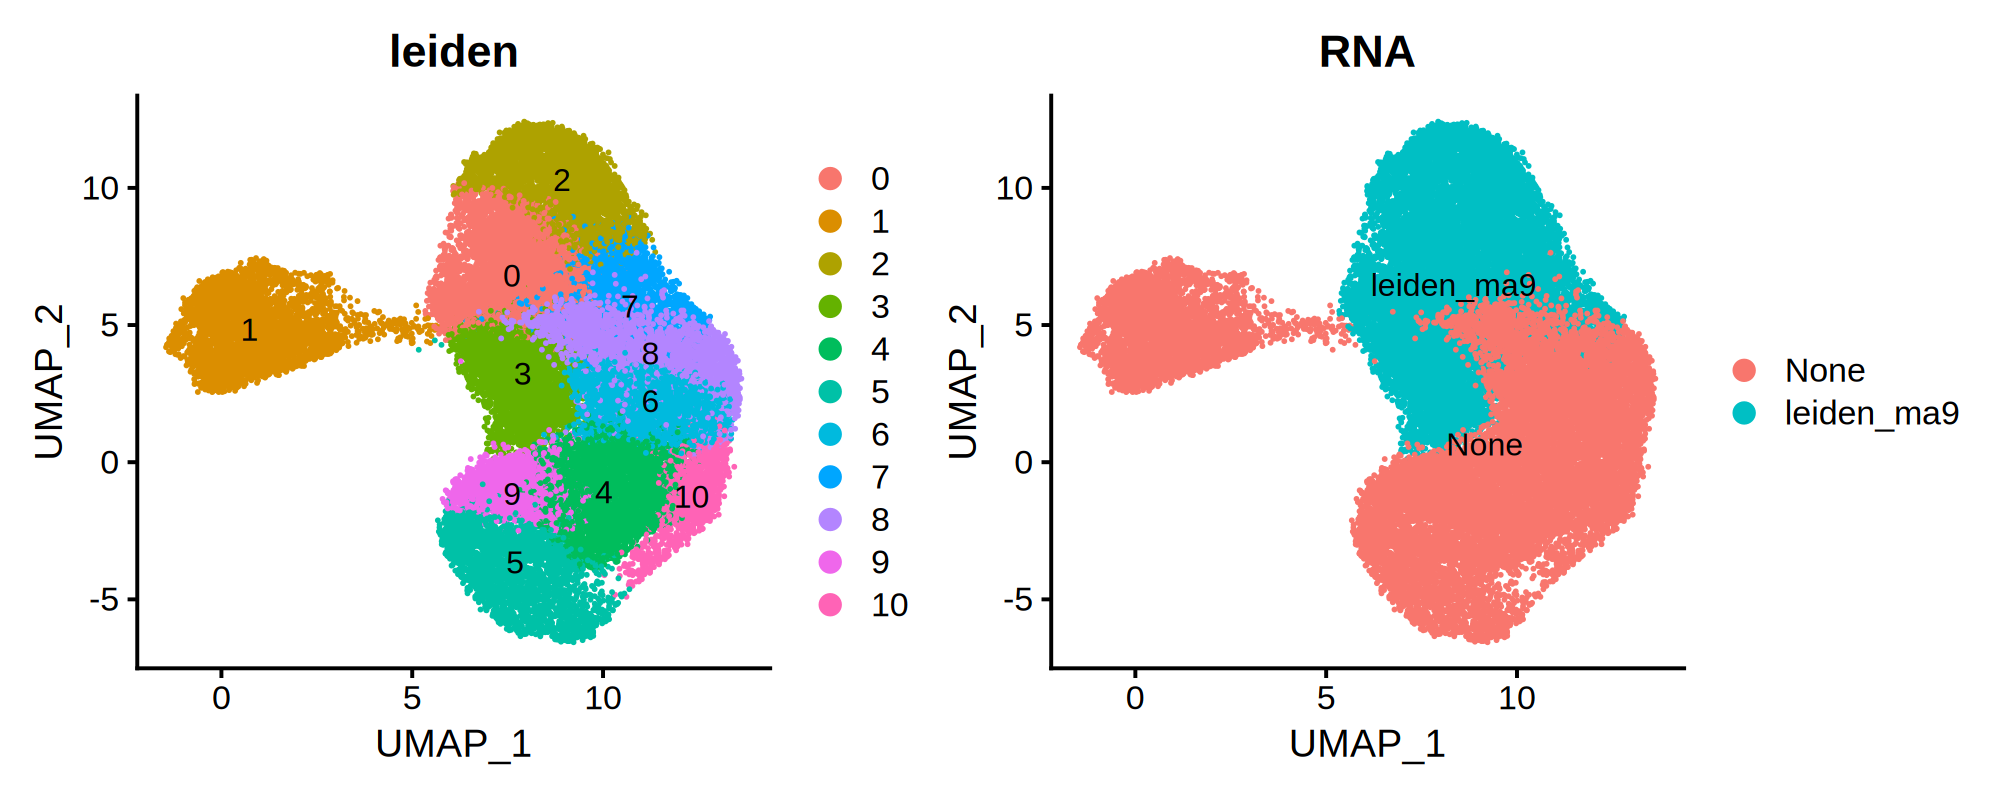

In [215]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 200)
DimPlot(ccc_rna, group.by = c("leiden", "leiden_ma9"), label = TRUE) + ggtitle("RNA") 


# import subcluster information for MSC from [combined analsis of MSC RNASeq and ATACSeq (R)](./JinWang/nb_niche_MSC_ATAC_R_Jun5.ipynb) <a name="combined_analysis"></a>


In [216]:
oo_msc_5 = readRDS('data/oo_msc_5.rds') 
rna_seu_5= readRDS('data/rna_seu_5.rds')


In [217]:
rna_seu_5

An object of class Seurat 
48513 features across 3624 samples within 2 assays 
Active assay: RNA (32285 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: SCT
 2 dimensional reductions calculated: pca, umap

In [218]:
oo_msc_5

An object of class Seurat 
215159 features across 3624 samples within 4 assays 
Active assay: ATAC (180869 features, 94095 variable features)
 2 layers present: counts, data
 3 other assays present: ACTIVITY, RNA, RNA2
 3 dimensional reductions calculated: lsi, umap, umap.atac

In [219]:
head2(oo_msc_5@meta.data)

orig.ident    nCount_ATAC nFeature_ATAC dataset  sampleID   
MA9_MSC_wk4__AAACAGCCAGTCTATG-1_1 SeuratProject  6568        5418         M4       MA9_MSC_wk4
MA9_MSC_wk4__AAACATGCAGGTTAAA-1_1 SeuratProject 14026       10027         ctrl_m6w MA9_MSC_wk4
MA9_MSC_wk4__AAACCAACACGCAACT-1_1 SeuratProject   339         326         M2       MA9_MSC_wk4

In [220]:
all(rownames(oo_msc_5@meta.data) == rownames(rna_seu_5@meta.data))

[1] TRUE

In [221]:
tmp = as.data.table(oo_msc_5@meta.data, keep.rownames = T)
tmp[, idd := 1:nrow(tmp) ]
tmp[, new_name := sub('..$', '', rn) ]
tmp = tmp[order(new_name), ]
tmp[, new_name2 := paste0(new_name, '_', 1:nrow(.SD)), by = 'new_name']
tmp = tmp[order(idd), ]
rna_seu_5@meta.data$new_name2 = tmp$new_name2
oo_msc_5@meta.data$new_name2 = tmp$new_name2
head(tmp)


rn                                orig.ident    nCount_ATAC nFeature_ATAC dataset  sampleID    ov   umap1      ATAC_snn_res.0.1 seurat_clusters ⋯ prediction.score.4 prediction.score.max
1 MA9_MSC_wk4__AAACAGCCAGTCTATG-1_1 SeuratProject  6568        5418         M4       MA9_MSC_wk4 TRUE -0.9180142 0                0               ⋯ 0                  0.5051624           
2 MA9_MSC_wk4__AAACATGCAGGTTAAA-1_1 SeuratProject 14026       10027         ctrl_m6w MA9_MSC_wk4 TRUE -1.3003601 0                0               ⋯ 0                  0.3085074           
3 MA9_MSC_wk4__AAACCAACACGCAACT-1_1 SeuratProject   339         326         M2       MA9_MSC_wk4 TRUE -1.2084350 0                0               ⋯ 0                  0.3374764           
4 MA9_MSC_wk4__AAACCGAAGGGCTAAA-1_1 SeuratProject   346         308         M4       MA9_MSC_wk4 TRUE  1.9936164 0                0               ⋯ 0                  0.5183688           
5 MA9_MSC_wk4__AAACCGGCAGTCTATG-1_1 SeuratProject  5042        4251         M3       MA9_MSC_wk4 TRUE -1.7758675 0                0               ⋯ 0                  0.4724460           
6 MA9_MSC_wk4__AAAGCACCAGTAGCCT-1_1 SeuratProject 13289        9874         M3       MA9_MSC_wk4 TRUE  2.7889803 1                2               ⋯ 0                  0.3445018           
  ATAC_snn_res.0.2 idd seurat_clusters_rna seurat_clusters_adj FRiP msc_4clusters new_name                        new_name2                        
1 0                1   0                   4                   NA   cl_other      MA9_MSC_wk4__AAACAGCCAGTCTATG-1 MA9_MSC_wk4__AAACAGCCAGTCTATG-1_1
2 0                2   0                   4                   NA   cl_other      MA9_MSC_wk4__AAACATGCAGGTTAAA-1 MA9_MSC_wk4__AAACATGCAGGTTAAA-1_1
3 0                3   0                   4                   NA   cl_other      MA9_MSC_wk4__AAACCAACACGCAACT-1 MA9_MSC_wk4__AAACCAACACGCAACT-1_1
4 0                4   0                   4                   NA   cl_other      MA9_MSC_wk4__AAACCGAAGGGCTAAA-1 MA9_MSC_wk4__AAACCGAAGGGCTAAA-1_1
5 0                5   0                   4                   NA   cl_other      MA9_MSC_wk4__AAACCGGCAGTCTATG-1 MA9_MSC_wk4__AAACCGGCAGTCTATG-1_1
6 2                6   0                   4                   NA   cl_other      MA9_MSC_wk4__AAAGCACCAGTAGCCT-1 MA9_MSC_wk4__AAAGCACCAGTAGCCT-1_1

# change the cell names for consistence between MSC and atac analysis

In [222]:
meta_df = as.data.table(ccc_rna@meta.data, keep.rownames = T)
meta_df[, idd := 1:nrow(meta_df)]


In [223]:
setkey(design, 'sample_name')
meta_df$sampleIDD = design[meta_df$sampleID, sampleIDD]

In [224]:
meta_df$old_name = meta_df$rn

In [227]:
meta_df$new_name = paste0(meta_df$sampleIDD, '__', sub('_.*', '', meta_df$old_name))
head(meta_df$new_name)

[1] "MA9_MSC_wk4__AAACAGCCAGTCTATG-1" "MA9_MSC_wk4__AAACATGCAGGTTAAA-1" "MA9_MSC_wk4__AAACCAACACGCAACT-1" "MA9_MSC_wk4__AAACCGAAGGGCTAAA-1" "MA9_MSC_wk4__AAACCGGCAGTCTATG-1"
[6] "MA9_MSC_wk4__AAAGCACCAGTAGCCT-1"

In [228]:
# add is_msc
meta_df[, is_msc := 'No']
meta_df[grep('MSC', new_name), is_msc := 'Yes']


In [229]:
meta_df = meta_df[order(new_name), ]

In [230]:
meta_df[, new_name2 := paste0(new_name, '_', 1:nrow(.SD)), by = 'new_name']


In [231]:
meta_df = meta_df[order(idd), ]
meta_df = setDF(meta_df[, 2:ncol(meta_df)], rownames = meta_df$rn)
                

In [233]:
ccc_rna@meta.data = meta_df


In [234]:
ccc_rna = RenameCells(ccc_rna, new.names = ccc_rna@meta.data$new_name2)
ccc_rna

An object of class Seurat 
17175 features across 34007 samples within 1 assay 
Active assay: RNA (17175 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: pca, umap

# add MSC clusters

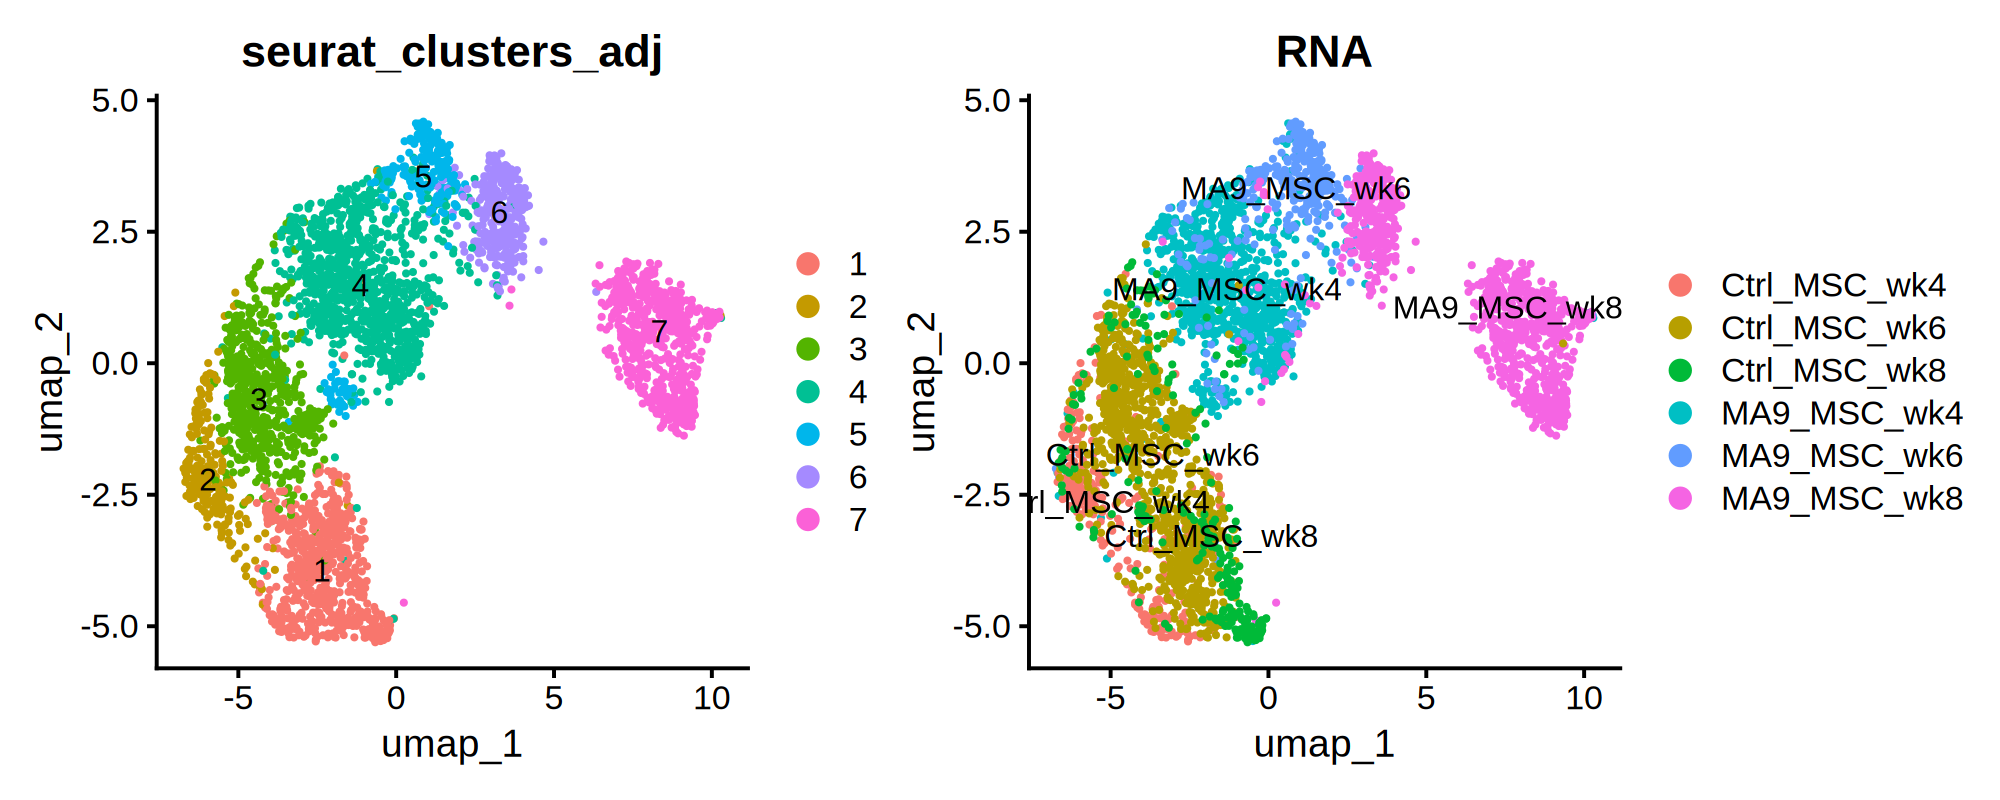

In [201]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 200)
DimPlot(rna_seu_5, group.by = c("seurat_clusters_adj", "orig.ident"), label = TRUE) + ggtitle("RNA") 


In [254]:
ccc_rna@meta.data$msc_seurat_clusters_adj = as.character(tmp[ccc_rna@meta.data$new_name2, seurat_clusters_adj])
ccc_rna@meta.data$msc_seurat_clusters_adj[is.na(ccc_rna@meta.data$msc_seurat_clusters_adj)] = 'HSC'

In [255]:
table(ccc_rna@meta.data$msc_seurat_clusters_adj)


    1     2     3     4     5     6     7   HSC 
  633   229   607   972   241   314   626 30385 

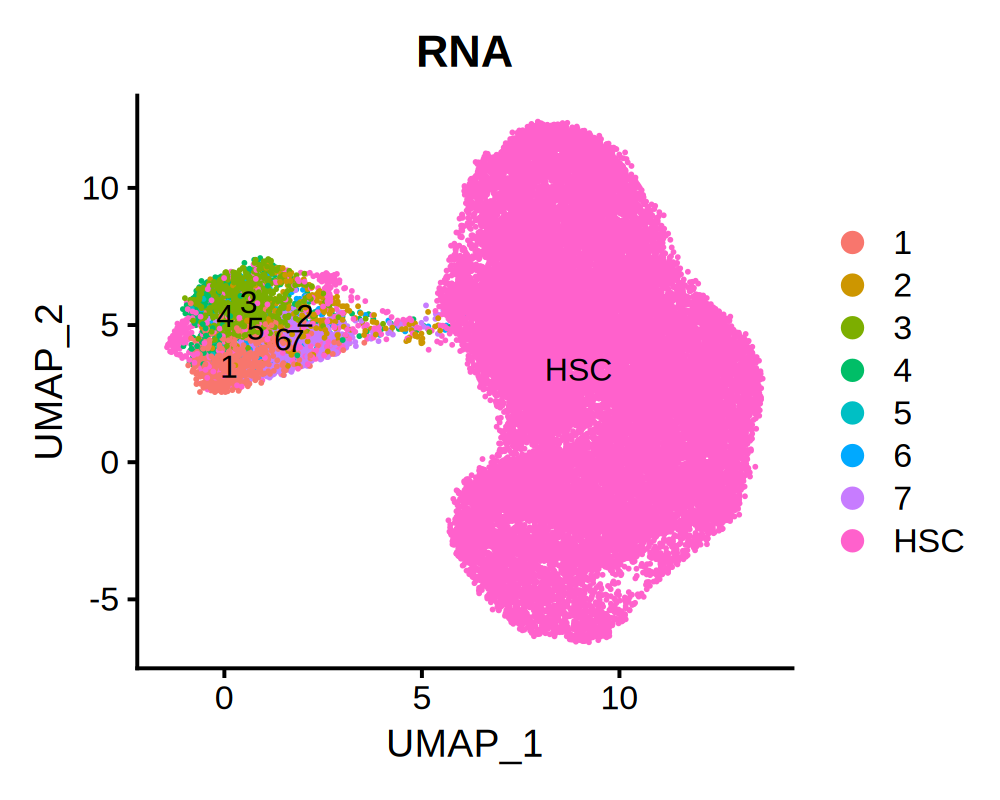

In [258]:
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 200)
DimPlot(ccc_rna, group.by = c("msc_seurat_clusters_adj"), label = TRUE) + ggtitle("RNA") 


# adjust leiden_ma9 cluster


 MA9N  MA9P   MSC 
14892 14959  4156 


      None leiden_ma9 
     19023      14984 

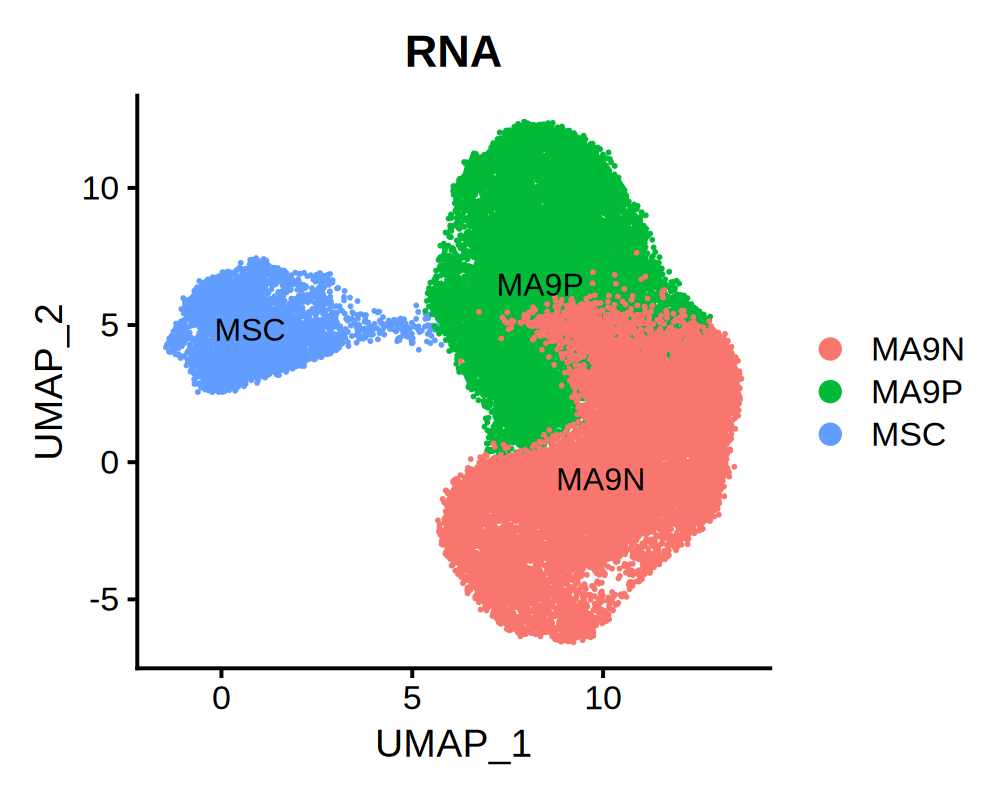

In [268]:
ccc_rna@meta.data$ma9 = as.character(ccc_rna@meta.data$leiden_ma9)
#ccc_rna@meta.data$ma9[is.na(ccc_rna@meta.data$leiden_ma9)] = 'MSC'
ccc_rna@meta.data$ma9[ccc_rna@meta.data$leiden_ma9 == 'None'] = 'MA9N'
ccc_rna@meta.data$ma9[ccc_rna@meta.data$leiden_ma9 == 'leiden_ma9'] = 'MA9P'
ccc_rna@meta.data$ma9[ccc_rna@meta.data$is_msc == 'Yes'] = 'MSC'
table(ccc_rna@meta.data$ma9)
table(ccc_rna@meta.data$leiden_ma9)
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 200)
DimPlot(ccc_rna, group.by = c("ma9"), label = TRUE) + ggtitle("RNA") 


# add ccc_group

In [269]:
ccc_rna@meta.data$ccc_group1 = paste0(ccc_rna@meta.data$sampleIDD, '__', ccc_rna@meta.data$ma9, '__', ccc_rna@meta.data$is_msc)
ccc_rna@meta.data$ccc_group2 = paste0(ccc_rna@meta.data$sampleIDD, '__', ccc_rna@meta.data$ma9, '__', ccc_rna@meta.data$msc_seurat_clusters_adj)

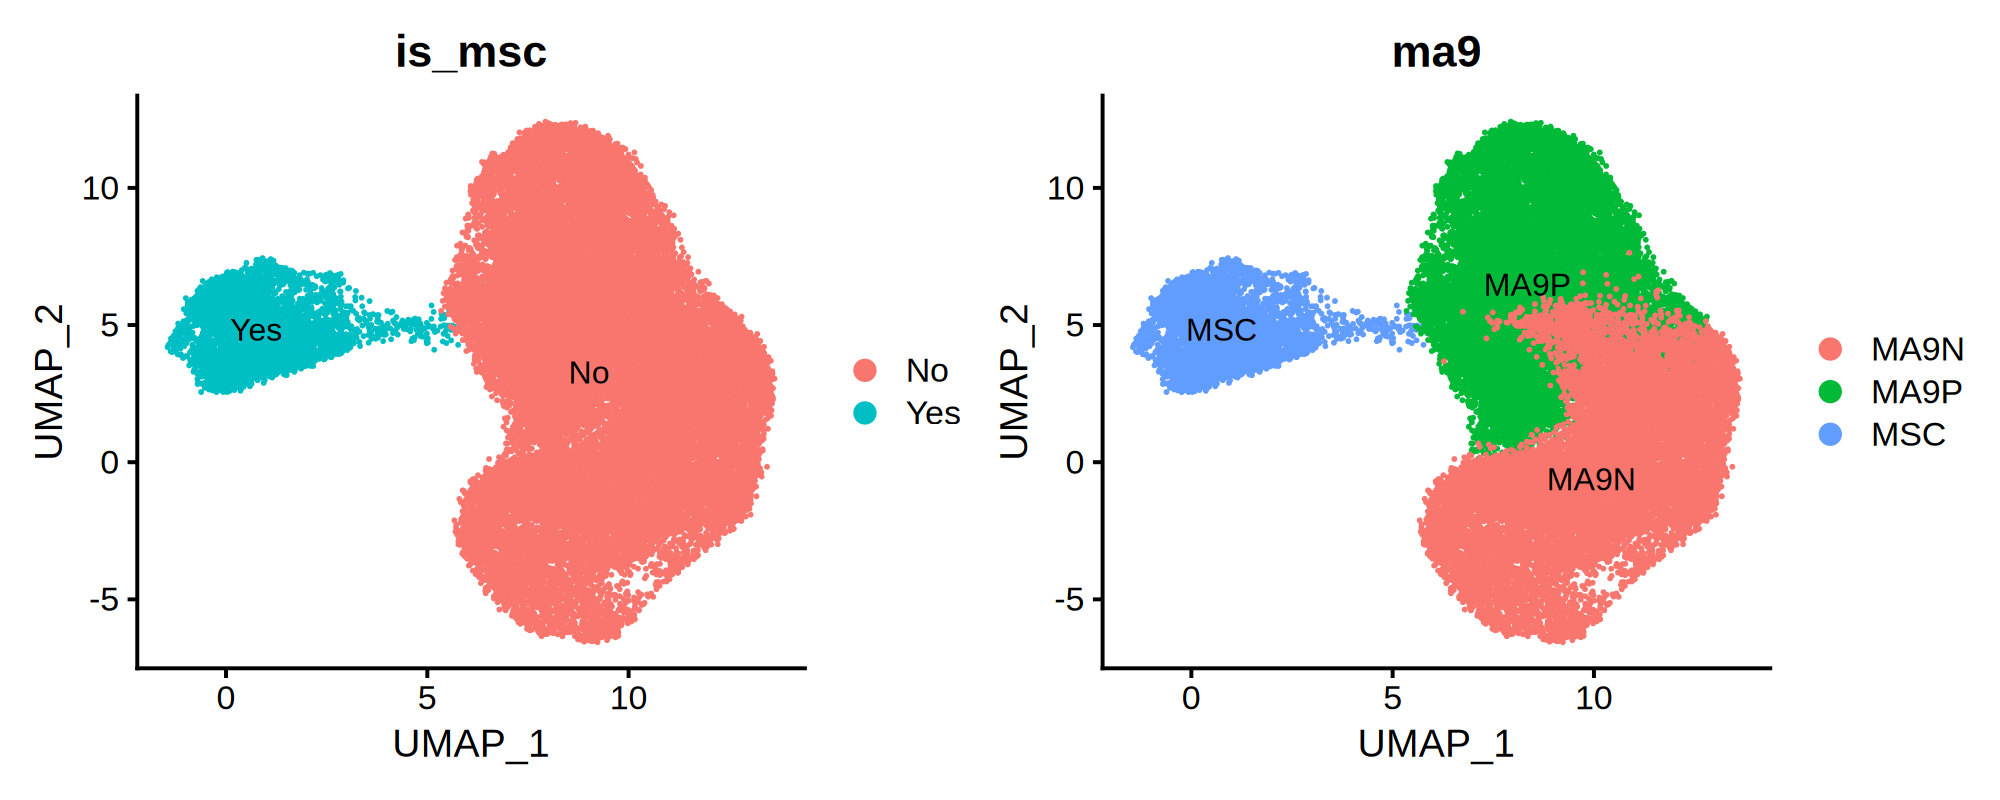

In [271]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 200)
DimPlot(ccc_rna, group.by = c("is_msc", 'ma9'), label = TRUE) 


- this data suppose have cell types based on MA9 and hNGFR expressions. 

In [30]:
#sceasy::convertFormat('data/adata_sel_udpate_may07.h5ad', from="anndata", to="seurat", outFile='data/adata_sel_udpate_may07.rds')
sceasy::convertFormat('data/nb_niche_scRNA_May2_python_adata_sel3_updated.h5ad', from="anndata", to="seurat", outFile='data/nb_niche_scRNA_May2_python_adata_sel3_updated.rds')


X -> counts



An object of class Seurat 
17175 features across 34072 samples within 1 assay 
Active assay: RNA (17175 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: pca, umap

In [139]:
rna = readRDS('data/nb_niche_scRNA_May2_python_adata_sel3_updated.rds')

In [111]:
rna

An object of class Seurat 
17175 features across 34072 samples within 1 assay 
Active assay: RNA (17175 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: pca, umap

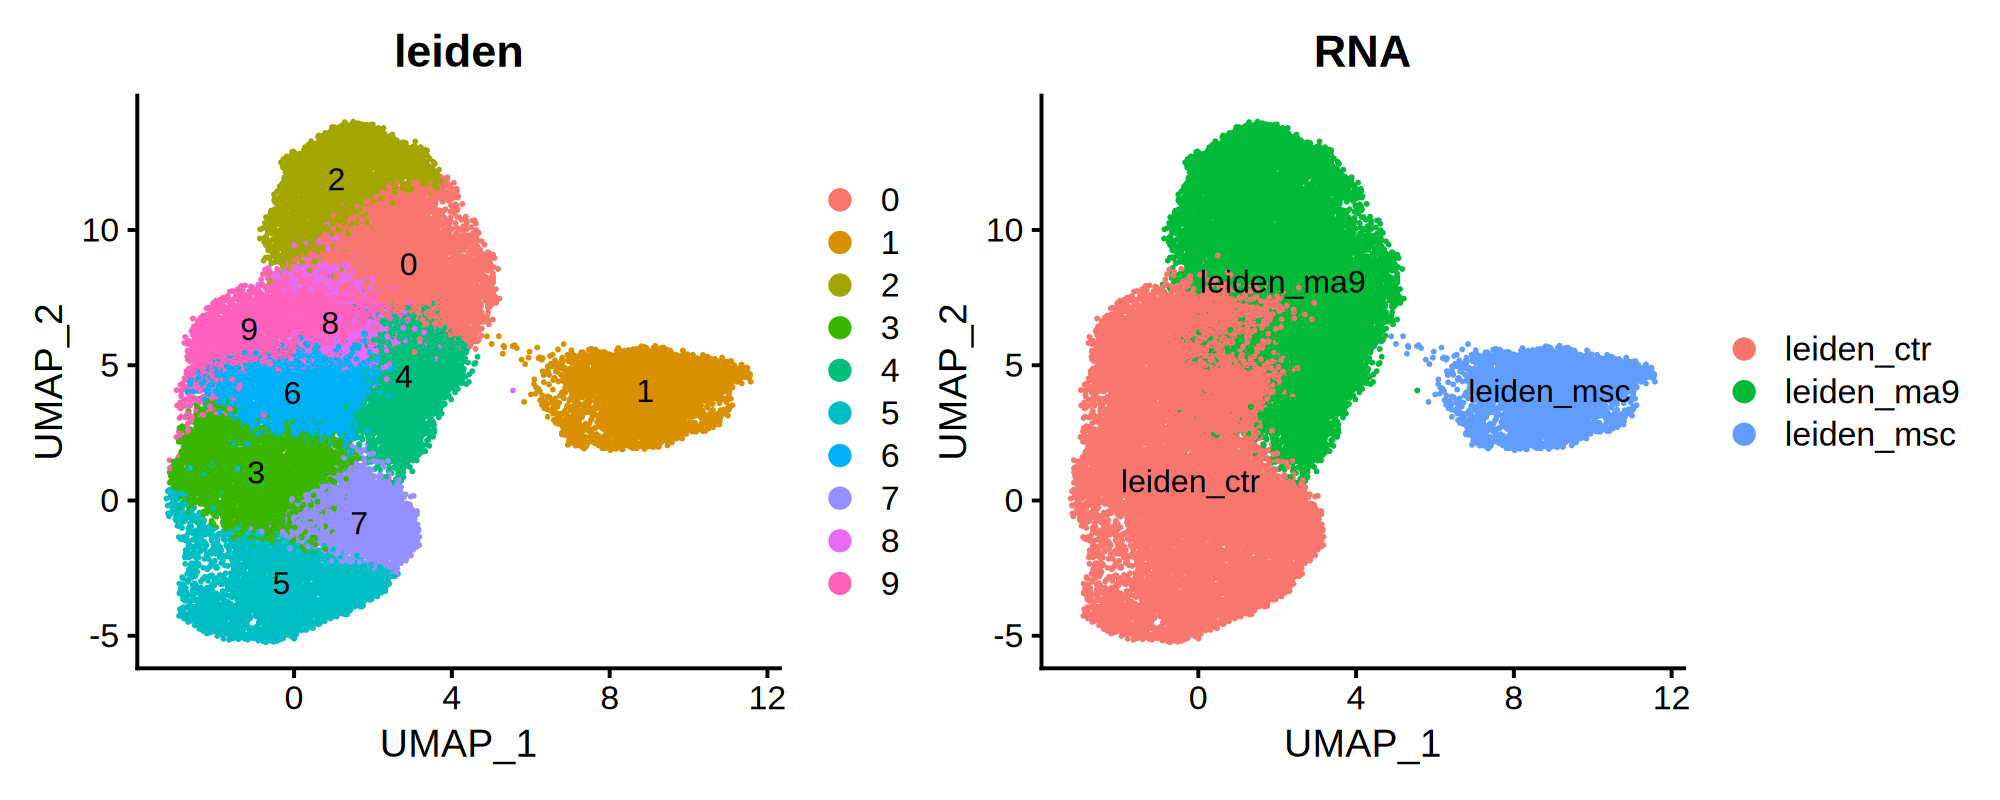

In [112]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 200)
DimPlot(rna, group.by = c("leiden", "leiden_ma9"), label = TRUE) + ggtitle("RNA") 


In [391]:
table(rna$sampleIDD, rna$leiden)

              
                  0    1    2    3    4    5    6    7    8    9
  Ctrl_HSC_wk4   40    0   14 1758   37 2093  858 1784   17  901
  Ctrl_HSC_wk6   44    0   11 1663   43  659 1678  421   18 1211
  Ctrl_HSC_wk8    3    0    7   97    5  473   46  398    4   60
  Ctrl_MSC_wk4    0  274    0    0    0    0    0    0    1    0
  Ctrl_MSC_wk6    0 1013    0    0    0    0    0    0    0    0
  Ctrl_MSC_wk8    0  316    0    0    0    0    0    0    0    0
  MA9_HSC_wk4   126    0  583  239  555   80  205  153   48   28
  MA9_HSC_wk6   754    0  375   53 1375   11   50   26  615   19
  MA9_HSC_wk8  3981    0 2829    1 1633    1   25    5 1994    9
  MA9_MSC_wk4     0 1013    0    0    0    0    0    0    0    0
  MA9_MSC_wk6     0  353    0    0    0    0    0    0    0    0
  MA9_MSC_wk8     3  982    0    0    0    0    0    0    1    0

In [140]:
# update cell names in the RNA object
rna_meta_dt = as.data.table(rna@meta.data, keep.rownames = T)
rna_meta_dt[, idd := 1:nrow(rna_meta_dt) ]
rna_meta_dt[, cell_id := sub('.*__(.*)_.*', '\\1', rn)]
rna_meta_dt[, cell_id := sub('_.*', '', cell_id)]
rna_meta_dt[, sample_name_short := sub('.*_', '', rn) ]
rna_meta_dt = merge(rna_meta_dt, ccc_design[, .(sample_name_short, sampleIDD)], by.x = 'sample_name_short', by.y = 'sample_name_short', all.x = T)
rna_meta_dt[, cell_full_id := paste0(sampleIDD, '__', cell_id)]
rna_meta_dt[, cell_full_id2 := paste0(cell_full_id, '_', 1:nrow(.SD)), by = 'cell_full_id']
rna_meta_dt = merge(rna_meta_dt, rna_seu_5@meta.data[, c('cell_full_name2', 'seurat_clusters_adj')], by.x = 'cell_full_id2', by.y = 'cell_full_name2', all.x =T)
rna_meta_dt = rna_meta_dt[order(idd), ]
rna_meta_dt[, cell_full_id := cell_full_id2]
rna_meta_dt[, cell_full_id2 := NULL]

rna_meta_dt[, sample_type := 'Ctrl']
rna_meta_dt[grep('MA9', sampleIDD), sample_type := 'mode']

rna_meta_dt[, cell_type := 'MSC']
rna_meta_dt[grep('HSC', sampleIDD), cell_type := 'HSC']

rna_meta_dt[, time_point := '4']
rna_meta_dt[grep('wk6', sampleIDD), time_point := '6']
rna_meta_dt[grep('wk8', sampleIDD), time_point := '8']

rna_meta_dt[, ccc_group := paste0(sample_type, '__', cell_type, '__', time_point, '__', leiden_ma9)]
rna_meta_dt[, ccc_group_kl := ccc_group ]
rna_meta_dt[leiden_ma9 == 'leiden_msc', ccc_group_kl := paste0(ccc_group, '__kl', seurat_clusters_adj)]

rna_meta_df = setDF(rna_meta_dt, rownames = rna_meta_dt$rn)

head(rna_meta_df)


sample_name_short rn                   
AAACAGCCAGTCTATG-1_M2 M2                AAACAGCCAGTCTATG-1_M2
AAACATGCAGGTTAAA-1_M2 M2                AAACATGCAGGTTAAA-1_M2
AAACCAACACGCAACT-1_M2 M2                AAACCAACACGCAACT-1_M2
AAACCGAAGGGCTAAA-1_M2 M2                AAACCGAAGGGCTAAA-1_M2
AAACCGGCAGTCTATG-1_M2 M2                AAACCGGCAGTCTATG-1_M2
AAAGCACCAGTAGCCT-1_M2 M2                AAAGCACCAGTAGCCT-1_M2
                      nFeaturess_RNA_by_counts total_counts total_counts_mt
AAACAGCCAGTCTATG-1_M2 1952                     4002         111            
AAACATGCAGGTTAAA-1_M2 2425                     5601          79            
AAACCAACACGCAACT-1_M2 1838                     3650          66            
AAACCGAAGGGCTAAA-1_M2 1412                     3377          17            
AAACCGGCAGTCTATG-1_M2 1426                     2444          20            
AAAGCACCAGTAGCCT-1_M2 1796                     4689          16            
                      pct_counts_mt total_counts_ribo pct_counts_ribo
AAACAGCCAGTCTATG-1_M2 2.7736132     109               2.7236381      
AAACATGCAGGTTAAA-1_M2 1.4104624     147               2.6245313      
AAACCAACACGCAACT-1_M2 1.8082192      38               1.0410959      
AAACCGAAGGGCTAAA-1_M2 0.5034054      18               0.5330175      
AAACCGGCAGTCTATG-1_M2 0.8183306      21               0.8592471      
AAAGCACCAGTAGCCT-1_M2 0.3412241      20               0.4265302      
                      total_counts_hb pct_counts_hb ⋯ idd cell_id           
AAACAGCCAGTCTATG-1_M2 0               0.00000000    ⋯ 1   AAACAGCCAGTCTATG-1
AAACATGCAGGTTAAA-1_M2 0               0.00000000    ⋯ 2   AAACATGCAGGTTAAA-1
AAACCAACACGCAACT-1_M2 0               0.00000000    ⋯ 3   AAACCAACACGCAACT-1
AAACCGAAGGGCTAAA-1_M2 1               0.02961208    ⋯ 4   AAACCGAAGGGCTAAA-1
AAACCGGCAGTCTATG-1_M2 0               0.00000000    ⋯ 5   AAACCGGCAGTCTATG-1
AAAGCACCAGTAGCCT-1_M2 0               0.00000000    ⋯ 6   AAAGCACCAGTAGCCT-1
                      sampleIDD   cell_full_id                     
AAACAGCCAGTCTATG-1_M2 MA9_MSC_wk4 MA9_MSC_wk4__AAACAGCCAGTCTATG-1_1
AAACATGCAGGTTAAA-1_M2 MA9_MSC_wk4 MA9_MSC_wk4__AAACATGCAGGTTAAA-1_1
AAACCAACACGCAACT-1_M2 MA9_MSC_wk4 MA9_MSC_wk4__AAACCAACACGCAACT-1_1
AAACCGAAGGGCTAAA-1_M2 MA9_MSC_wk4 MA9_MSC_wk4__AAACCGAAGGGCTAAA-1_1
AAACCGGCAGTCTATG-1_M2 MA9_MSC_wk4 MA9_MSC_wk4__AAACCGGCAGTCTATG-1_1
AAAGCACCAGTAGCCT-1_M2 MA9_MSC_wk4 MA9_MSC_wk4__AAAGCACCAGTAGCCT-1_1
                      seurat_clusters_adj sample_type cell_type time_point
AAACAGCCAGTCTATG-1_M2 3                   mode        MSC       4         
AAACATGCAGGTTAAA-1_M2 3                   mode        MSC       4         
AAACCAACACGCAACT-1_M2 3                   mode        MSC       4         
AAACCGAAGGGCTAAA-1_M2 3                   mode        MSC       4         
AAACCGGCAGTCTATG-1_M2 3                   mode        MSC       4         
AAAGCACCAGTAGCCT-1_M2 3                   mode        MSC       4         
                      ccc_group                ccc_group_kl                 
AAACAGCCAGTCTATG-1_M2 mode__MSC__4__leiden_msc mode__MSC__4__leiden_msc__kl3
AAACATGCAGGTTAAA-1_M2 mode__MSC__4__leiden_msc mode__MSC__4__leiden_msc__kl3
AAACCAACACGCAACT-1_M2 mode__MSC__4__leiden_msc mode__MSC__4__leiden_msc__kl3
AAACCGAAGGGCTAAA-1_M2 mode__MSC__4__leiden_msc mode__MSC__4__leiden_msc__kl3
AAACCGGCAGTCTATG-1_M2 mode__MSC__4__leiden_msc mode__MSC__4__leiden_msc__kl3
AAAGCACCAGTAGCCT-1_M2 mode__MSC__4__leiden_msc mode__MSC__4__leiden_msc__kl3

In [ ]:
rna@meta.data = rna_meta_df


In [366]:
tmp = as.data.table(table(rna_meta_dt$ccc_group))
tmp = tmp[!(grepl('Ctrl__', V1) & grepl('leiden_ma9', V1)), ][N > 50, ]
tmp


V1                       N    
1  Ctrl__HSC__4__leiden_ctr  7394
2  Ctrl__HSC__6__leiden_ctr  5632
3  Ctrl__HSC__8__leiden_ctr  1074
4  Ctrl__MSC__4__leiden_msc   274
5  Ctrl__MSC__6__leiden_msc  1013
6  Ctrl__MSC__8__leiden_msc   316
7  mode__HSC__4__leiden_ctr   705
8  mode__HSC__4__leiden_ma9  1312
9  mode__HSC__6__leiden_ctr   159
10 mode__HSC__6__leiden_ma9  3119
11 mode__HSC__8__leiden_ma9 10437
12 mode__MSC__4__leiden_msc  1013
13 mode__MSC__6__leiden_msc   353
14 mode__MSC__8__leiden_msc   982

In [371]:
rna_meta_df = rna_meta_df[rna_meta_df$ccc_group %in% tmp$V1, ]
head(rna_meta_df)


sample_name_short rn                   
AAACAGCCAGTCTATG-1_M2 M2                AAACAGCCAGTCTATG-1_M2
AAACATGCAGGTTAAA-1_M2 M2                AAACATGCAGGTTAAA-1_M2
AAACCAACACGCAACT-1_M2 M2                AAACCAACACGCAACT-1_M2
AAACCGAAGGGCTAAA-1_M2 M2                AAACCGAAGGGCTAAA-1_M2
AAACCGGCAGTCTATG-1_M2 M2                AAACCGGCAGTCTATG-1_M2
AAAGCACCAGTAGCCT-1_M2 M2                AAAGCACCAGTAGCCT-1_M2
                      nFeaturess_RNA_by_counts total_counts total_counts_mt
AAACAGCCAGTCTATG-1_M2 1952                     4002         111            
AAACATGCAGGTTAAA-1_M2 2425                     5601          79            
AAACCAACACGCAACT-1_M2 1838                     3650          66            
AAACCGAAGGGCTAAA-1_M2 1412                     3377          17            
AAACCGGCAGTCTATG-1_M2 1426                     2444          20            
AAAGCACCAGTAGCCT-1_M2 1796                     4689          16            
                      pct_counts_mt total_counts_ribo pct_counts_ribo
AAACAGCCAGTCTATG-1_M2 2.7736132     109               2.7236381      
AAACATGCAGGTTAAA-1_M2 1.4104624     147               2.6245313      
AAACCAACACGCAACT-1_M2 1.8082192      38               1.0410959      
AAACCGAAGGGCTAAA-1_M2 0.5034054      18               0.5330175      
AAACCGGCAGTCTATG-1_M2 0.8183306      21               0.8592471      
AAAGCACCAGTAGCCT-1_M2 0.3412241      20               0.4265302      
                      total_counts_hb pct_counts_hb ⋯ idd cell_id           
AAACAGCCAGTCTATG-1_M2 0               0.00000000    ⋯ 1   AAACAGCCAGTCTATG-1
AAACATGCAGGTTAAA-1_M2 0               0.00000000    ⋯ 2   AAACATGCAGGTTAAA-1
AAACCAACACGCAACT-1_M2 0               0.00000000    ⋯ 3   AAACCAACACGCAACT-1
AAACCGAAGGGCTAAA-1_M2 1               0.02961208    ⋯ 4   AAACCGAAGGGCTAAA-1
AAACCGGCAGTCTATG-1_M2 0               0.00000000    ⋯ 5   AAACCGGCAGTCTATG-1
AAAGCACCAGTAGCCT-1_M2 0               0.00000000    ⋯ 6   AAAGCACCAGTAGCCT-1
                      sampleIDD   cell_full_id                     
AAACAGCCAGTCTATG-1_M2 MA9_MSC_wk4 MA9_MSC_wk4__AAACAGCCAGTCTATG-1_1
AAACATGCAGGTTAAA-1_M2 MA9_MSC_wk4 MA9_MSC_wk4__AAACATGCAGGTTAAA-1_1
AAACCAACACGCAACT-1_M2 MA9_MSC_wk4 MA9_MSC_wk4__AAACCAACACGCAACT-1_1
AAACCGAAGGGCTAAA-1_M2 MA9_MSC_wk4 MA9_MSC_wk4__AAACCGAAGGGCTAAA-1_1
AAACCGGCAGTCTATG-1_M2 MA9_MSC_wk4 MA9_MSC_wk4__AAACCGGCAGTCTATG-1_1
AAAGCACCAGTAGCCT-1_M2 MA9_MSC_wk4 MA9_MSC_wk4__AAAGCACCAGTAGCCT-1_1
                      seurat_clusters_adj sample_type cell_type time_point
AAACAGCCAGTCTATG-1_M2 3                   mode        MSC       4         
AAACATGCAGGTTAAA-1_M2 3                   mode        MSC       4         
AAACCAACACGCAACT-1_M2 3                   mode        MSC       4         
AAACCGAAGGGCTAAA-1_M2 3                   mode        MSC       4         
AAACCGGCAGTCTATG-1_M2 3                   mode        MSC       4         
AAAGCACCAGTAGCCT-1_M2 3                   mode        MSC       4         
                      ccc_group                ccc_group_kl                 
AAACAGCCAGTCTATG-1_M2 mode__MSC__4__leiden_msc mode__MSC__4__leiden_msc__kl3
AAACATGCAGGTTAAA-1_M2 mode__MSC__4__leiden_msc mode__MSC__4__leiden_msc__kl3
AAACCAACACGCAACT-1_M2 mode__MSC__4__leiden_msc mode__MSC__4__leiden_msc__kl3
AAACCGAAGGGCTAAA-1_M2 mode__MSC__4__leiden_msc mode__MSC__4__leiden_msc__kl3
AAACCGGCAGTCTATG-1_M2 mode__MSC__4__leiden_msc mode__MSC__4__leiden_msc__kl3
AAAGCACCAGTAGCCT-1_M2 mode__MSC__4__leiden_msc mode__MSC__4__leiden_msc__kl3

In [376]:
rna2 = subset(rna, cells = rownames(rna_meta_df))
rna2

An object of class Seurat 
17175 features across 33783 samples within 1 assay 
Active assay: RNA (17175 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: pca, umap

In [142]:
rna@meta.data = rna_meta_df


In [311]:
saveRDS(rna, file = 'data/rna_nb_ccc_liana_R.rds')
saveRDS(rna2, file = 'data/rna2_nb_ccc_liana_R.rds')


# run liana aggregate

In [292]:
liana_test <- liana_wrap(ccc_rna, idents_col = 'ccc_group1',  resource = 'MouseConsensus',  permutation.params = list(nperms = 2))
liana_test <- liana_test %>% liana_aggregate()


Expression from the `RNA` assay will be used

Running LIANA with `ccc_group1` as labels!

`Idents` were converted to factor

Warning message in exec(output, ...):
“883 genes and/or 0 cells were removed as they had no counts!”
LIANA: LR summary stats calculated!

Now Running: Natmi

Now Running: Connectome

Now Running: Logfc

Now Running: Sca

Now Running: Cellphonedb

Now aggregating natmi

Now aggregating connectome

Now aggregating logfc

Now aggregating sca

Now aggregating cellphonedb

Aggregating Ranks



In [338]:
saveRDS(liana_test, file = 'data/liana_test_Jul30.rds')

In [513]:
liana_test = readRDS('data/liana_test_Jul30.rds')

In [514]:
unique(liana_test$source)

[1] "MA9_MSC_wk8__MSC__Yes"  "Ctrl_MSC_wk6__MSC__Yes" "MA9_MSC_wk6__MSC__Yes"  "Ctrl_MSC_wk4__MSC__Yes" "Ctrl_MSC_wk8__MSC__Yes" "MA9_MSC_wk4__MSC__Yes"  "MA9_HSC_wk4__MA9P__No" 
 [8] "MA9_HSC_wk8__MA9P__No"  "MA9_HSC_wk8__MA9N__No"  "MA9_HSC_wk6__MA9P__No"  "Ctrl_HSC_wk6__MA9N__No" "MA9_HSC_wk4__MA9N__No"  "Ctrl_HSC_wk8__MA9N__No" "MA9_HSC_wk6__MA9N__No" 
[15] "Ctrl_HSC_wk4__MA9N__No"

# plot liana aggregate

## rename cell population

In [515]:
liana_test$source = gsub('__', '_', liana_test$source) 
liana_test$target = gsub('__', '_', liana_test$target) 
name_dt = data.table(names = unique(c(liana_test$source, liana_test$target)))
name_dt[, new_name := paste(unlist(strsplit(names, '_'))[c(1,3,4)], collapse = '_'), by = 1:nrow(name_dt) ]
setkey(name_dt, 'names')
liana_test$source = name_dt[liana_test$source, new_name] 
liana_test$target = name_dt[liana_test$target, new_name] 


## plot summarized heatmap

In [451]:
liana_trunc <- liana_test %>%
   # only keep interactions concordant between methods
  filter(aggregate_rank <= 0.01) # note that these pvals are already corrected


In [460]:
mat = liana_trunc %>% group_by(source, target) %>% summarise(freq = n(), 
        .groups = "keep") %>% pivot_wider(id_cols = source, names_from = target, 
        values_from = freq, values_fill = 0) %>% arrange(source) %>% 
        ungroup() %>% as.data.frame() %>% column_to_rownames("source") %>% 
        as.matrix()


In [461]:
mat = rbind(mat, Ctrl_wk4_MA9N = 0)

In [462]:
dim(mat)

[1] 15 15

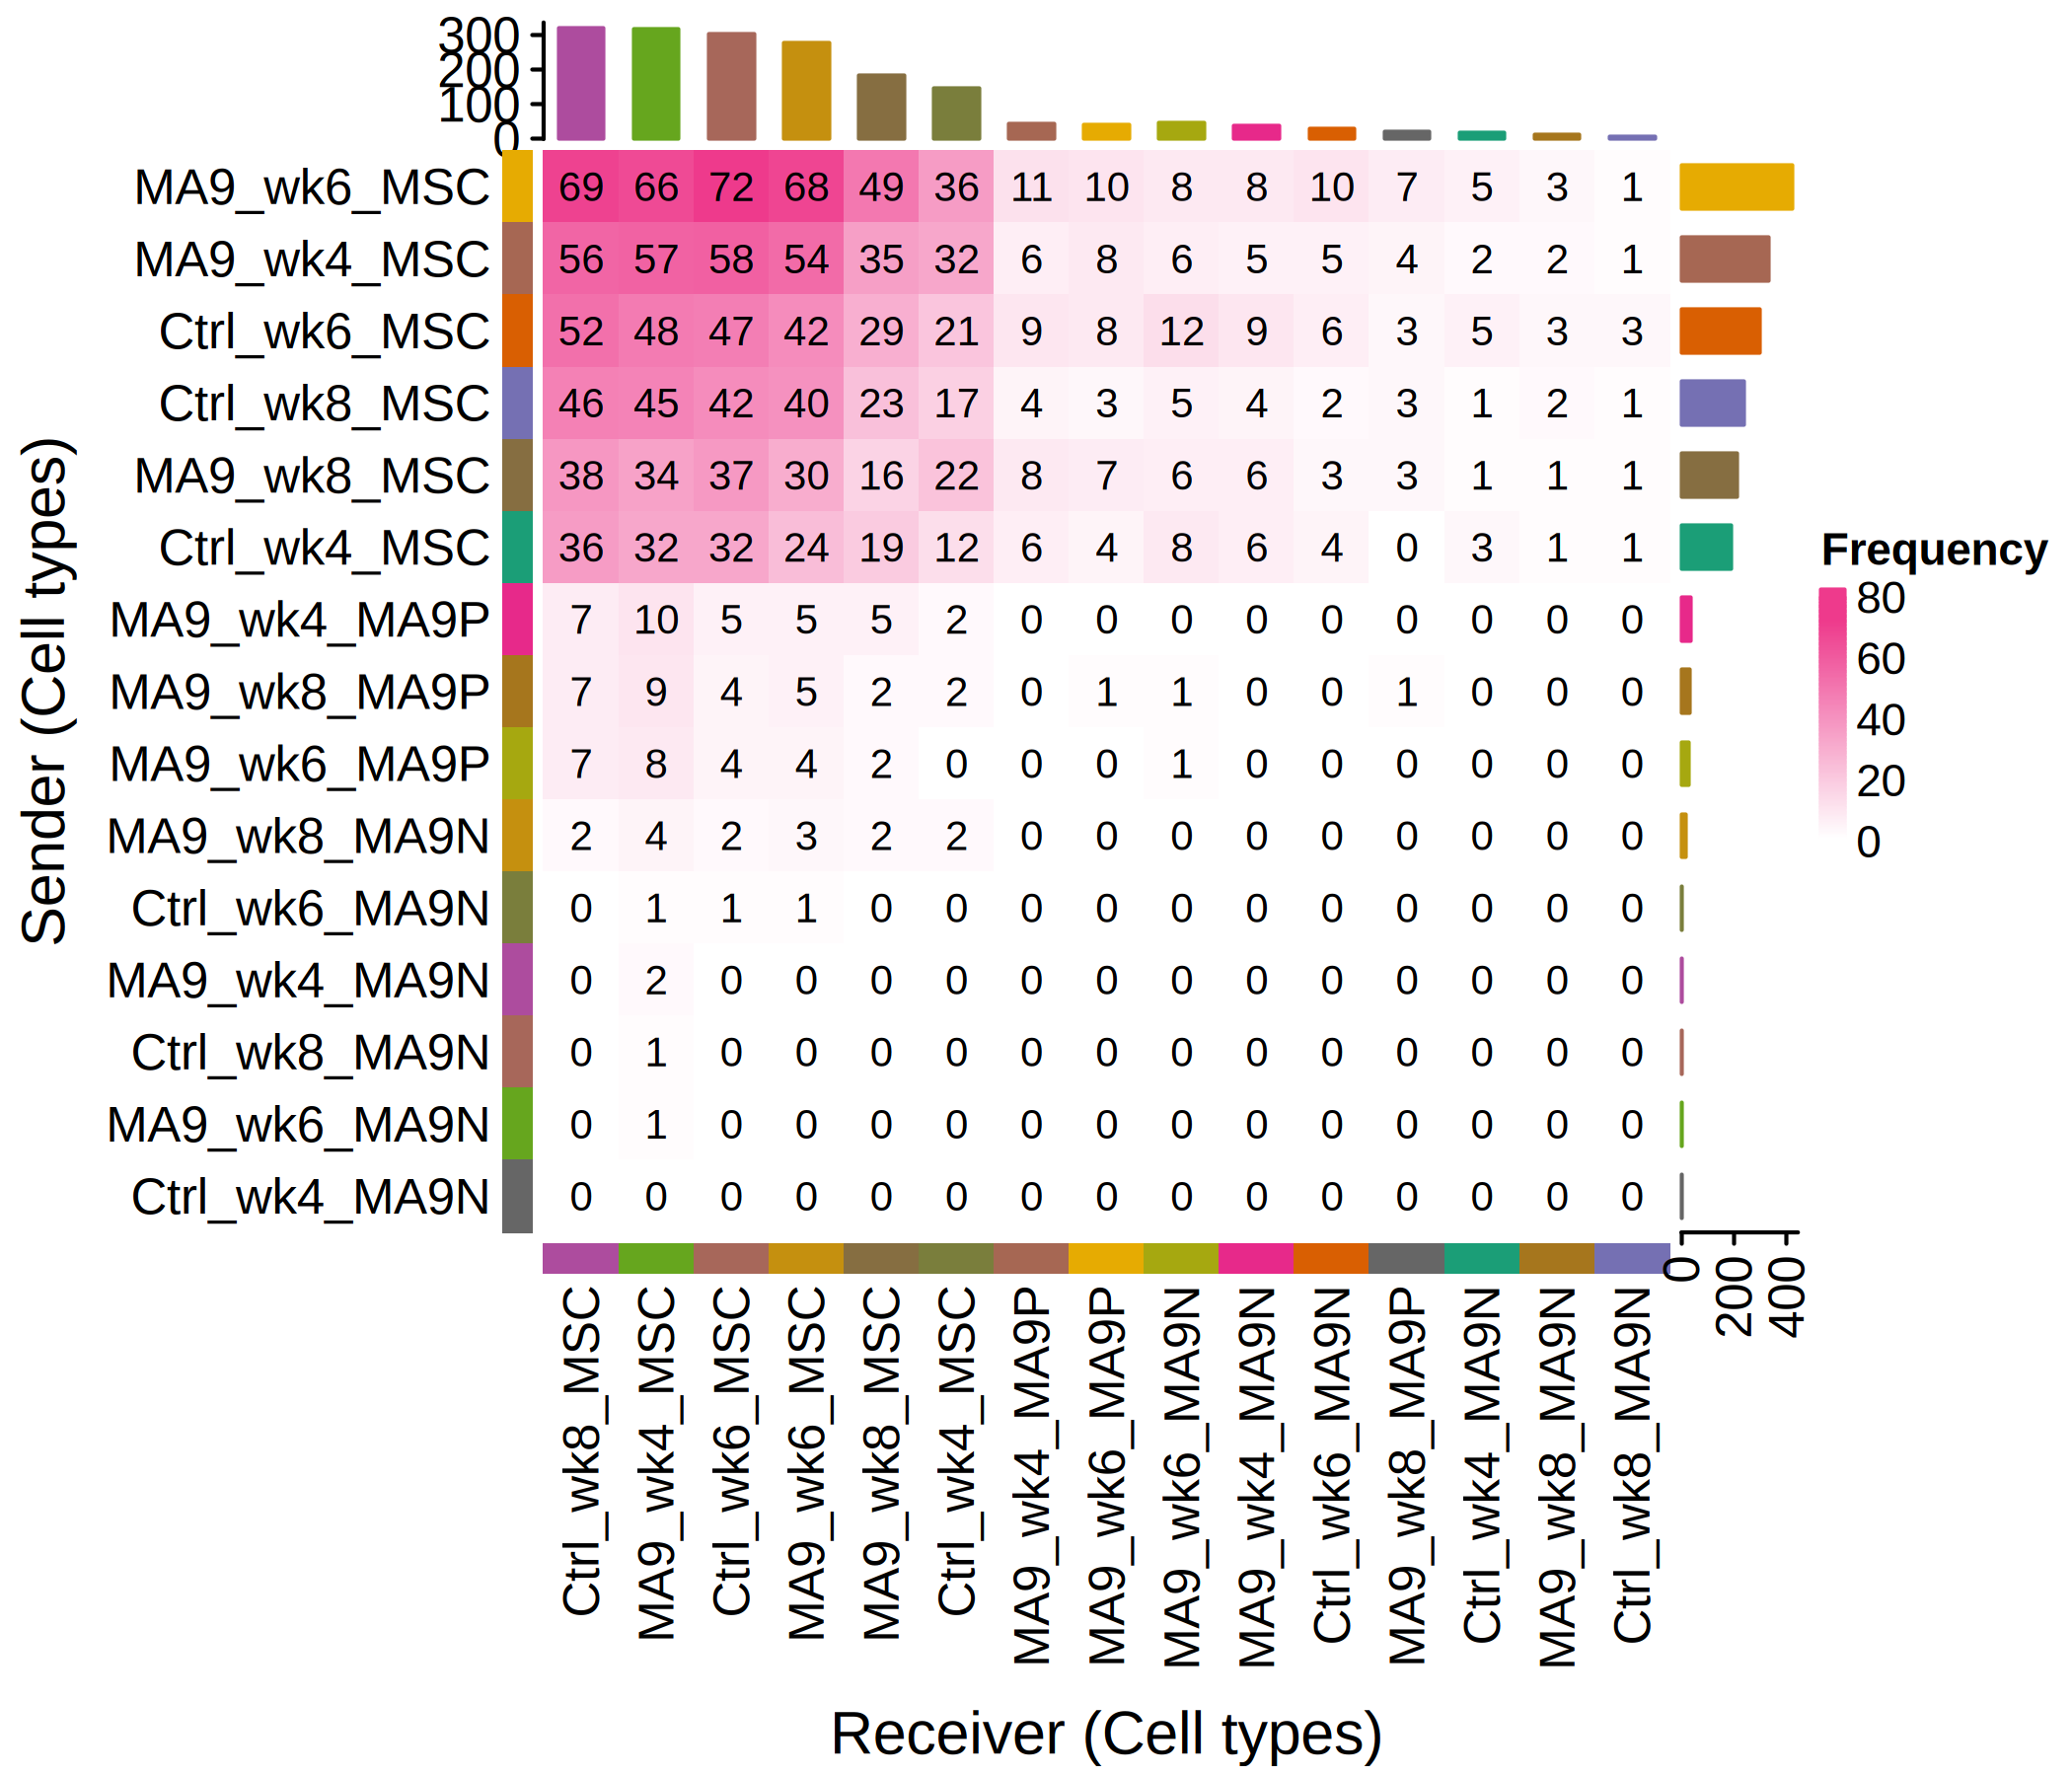

In [477]:
options(repr.plot.width = 7, repr.plot.height = 6, repr.plot.res = 300)
liana_heatmap_2(mat, grid_text = T)


In [476]:
liana_heatmap_2 = function (mat, font_size = 12, grid_text = FALSE, name = "Frequency", 
                          pallette = c("white", "violetred2"), row_title = "Sender (Cell types)",  column_title = "Receiver (Cell types)")  {
    if (grid_text) {
        grid_text <- function(j, i, x, y, width, height, fill) {
            grid_text <- grid.text(sprintf("%d", mat[i, j]), 
                                   x, y, gp = gpar(fontsize = font_size * 0.83))
        }
    }
    else {
        grid_text <- NULL
    }
    cell_anno <- unique(rownames(mat))
    cell_anno <- (grDevices::colorRampPalette((RColorBrewer::brewer.pal(n = 8, 
                                                                        name = "Dark2"))))(length(cell_anno)) %>% setNames(cell_anno)
    ha_opts <- list(show_legend = FALSE, show_annotation_name = FALSE, 
                    col = list(anno = cell_anno), simple_anno_size = grid::unit(0.25, 
                                                                    "cm"))
    column_ha <- exec("HeatmapAnnotation", anno = names(cell_anno), 
                      !!!ha_opts)
    row_ha <- exec("rowAnnotation", anno = names(cell_anno), 
                   !!!ha_opts)
    column_bar <- ComplexHeatmap::HeatmapAnnotation(bar = liana:::.anno_barplot(colSums(mat), 
                                                                        cell_anno, axis.font.size = font_size * 0.5), annotation_name_gp = gpar(fontsize = font_size * 
                                                                                0.5), show_legend = FALSE, show_annotation_name = FALSE)
    row_bar <- ComplexHeatmap::rowAnnotation(bar2 = liana:::.anno_barplot(rowSums(mat), 
                                                                  cell_anno, font_size * 0.5), gp = gpar(fill = cell_anno, 
                                               col = cell_anno), show_legend = FALSE, show_annotation_name = FALSE)
    ComplexHeatmap::Heatmap(mat, col = colorRampPalette(pallette)(10), show_column_dend = F, show_row_dend = F,
                            cluster_rows = T, cluster_columns = T, row_names_side = "left", 
                            top_annotation = column_bar, bottom_annotation = column_ha, 
                            right_annotation = row_bar, left_annotation = row_ha, 
                            row_title = row_title, row_names_gp = gpar(fontsize = font_size), 
                            row_title_gp = gpar(fontsize = font_size * 1.2), column_names_gp = gpar(fontsize = font_size), 
                            column_title = column_title, column_title_gp = gpar(fontsize = font_size * 
                                                            1.2), column_title_side = "bottom", heatmap_legend_param = list(title_gp = gpar(fontsize = font_size * 
                                                                                            0.9, fontface = "bold"), border = NA, labels_gp = gpar(fontsize = font_size * 
                                                                   0.9), grid_width = unit(2, "mm")), name = name, cell_fun = grid_text)
}


## plot summarized circle 

Note: 7 points are out of plotting region in sector 'wk4_MSC', track '1'.

Note: 7 points are out of plotting region in sector 'wk6_MSC', track '1'.

Note: 7 points are out of plotting region in sector 'wk8_MSC', track '1'.

Note: 8 points are out of plotting region in sector 'wk4_MA9N', track '1'.

Note: 8 points are out of plotting region in sector 'wk4_MA9P', track '1'.

Note: 8 points are out of plotting region in sector 'wk6_MA9N', track '1'.

Note: 8 points are out of plotting region in sector 'wk6_MA9P', track '1'.

Note: 8 points are out of plotting region in sector 'wk8_MA9N', track '1'.

Note: 8 points are out of plotting region in sector 'wk8_MA9P', track '1'.



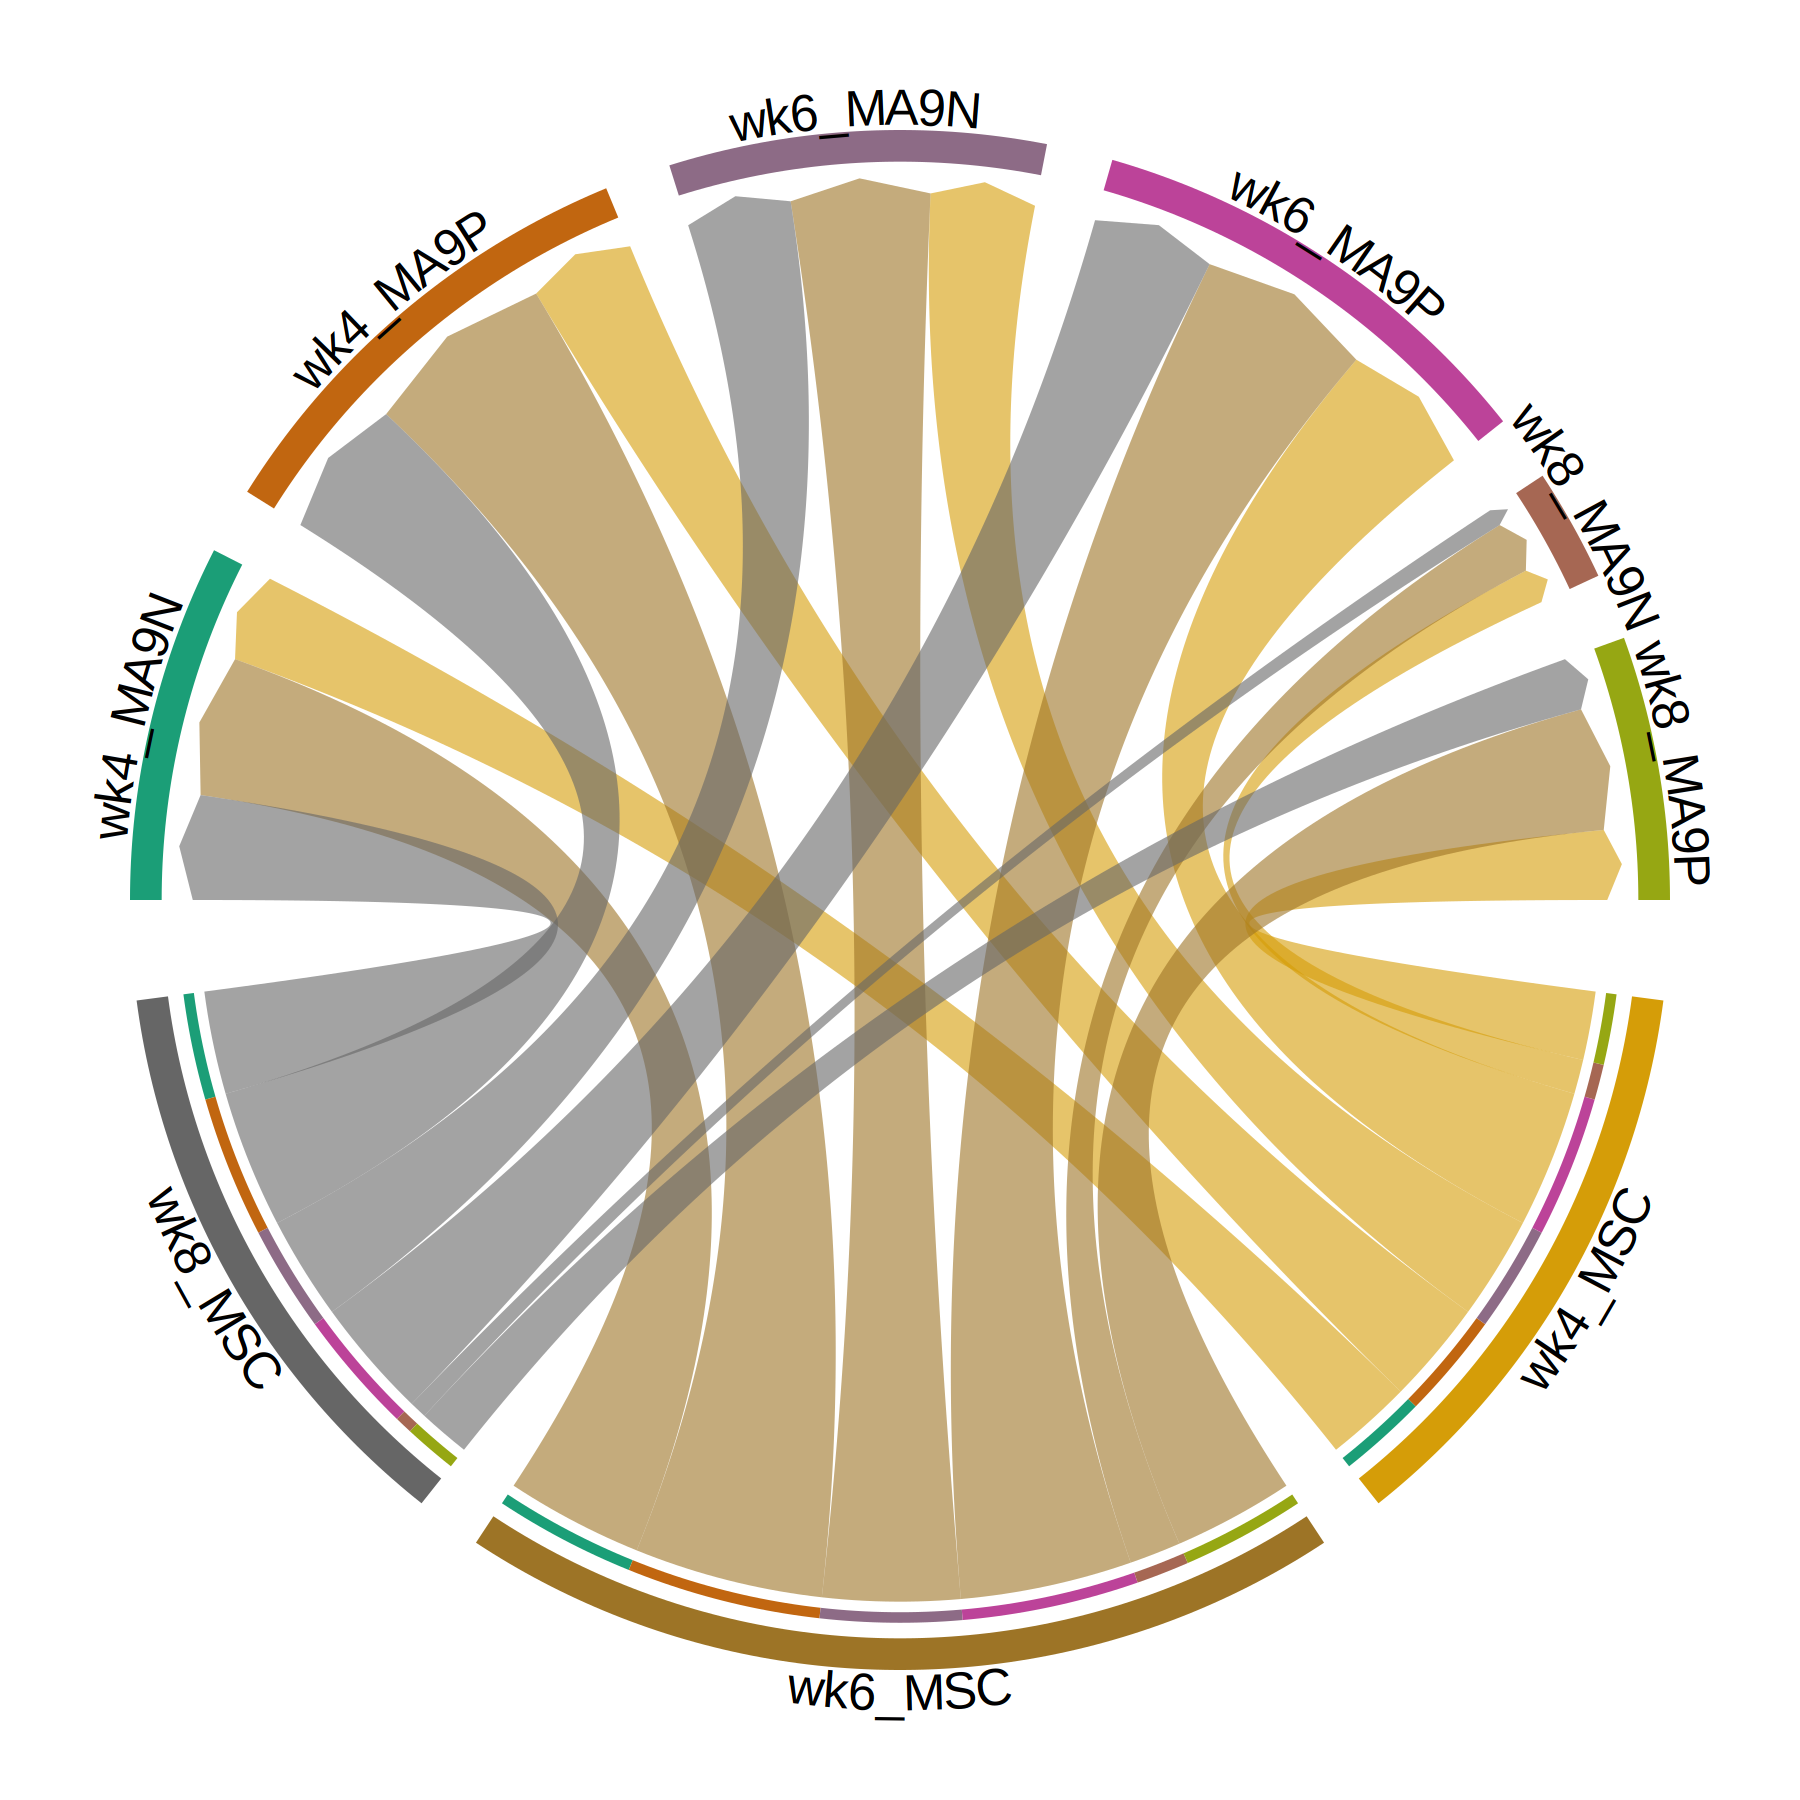

In [502]:
# MA9 model
liana_trunc <- liana_test %>%
   # only keep interactions concordant between methods
  filter(aggregate_rank <= 0.01) # note that these pvals are already corrected

source_groups = unique(liana_trunc$source[grepl('MSC', liana_trunc$source) & grepl('^MA9', liana_trunc$source)])
target_groups = unique(liana_trunc$target[!grepl('MSC', liana_trunc$target) & grepl('^MA9', liana_trunc$target)])
liana_trunc$source = sub('MA9_', '', liana_trunc$source) 
liana_trunc$target = sub('MA9_', '', liana_trunc$target) 
source_groups = sub('MA9_', '', source_groups)
target_groups = sub('MA9_', '', target_groups)

options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 300)
p <- chord_freq(liana_trunc, source_groups = source_groups, target_groups = target_groups, adj = c(.5, 2.1), cex = 1, facing = 'bending.outside')


Note: 8 points are out of plotting region in sector 'wk4_MA9N', track '1'.

Note: 8 points are out of plotting region in sector 'wk4_MA9P', track '1'.

Note: 8 points are out of plotting region in sector 'wk6_MA9N', track '1'.

Note: 8 points are out of plotting region in sector 'wk6_MA9P', track '1'.

Note: 8 points are out of plotting region in sector 'wk8_MA9N', track '1'.

Note: 8 points are out of plotting region in sector 'wk8_MA9P', track '1'.

Note: 7 points are out of plotting region in sector 'wk4_MSC', track '1'.

Note: 7 points are out of plotting region in sector 'wk6_MSC', track '1'.

Note: 7 points are out of plotting region in sector 'wk8_MSC', track '1'.



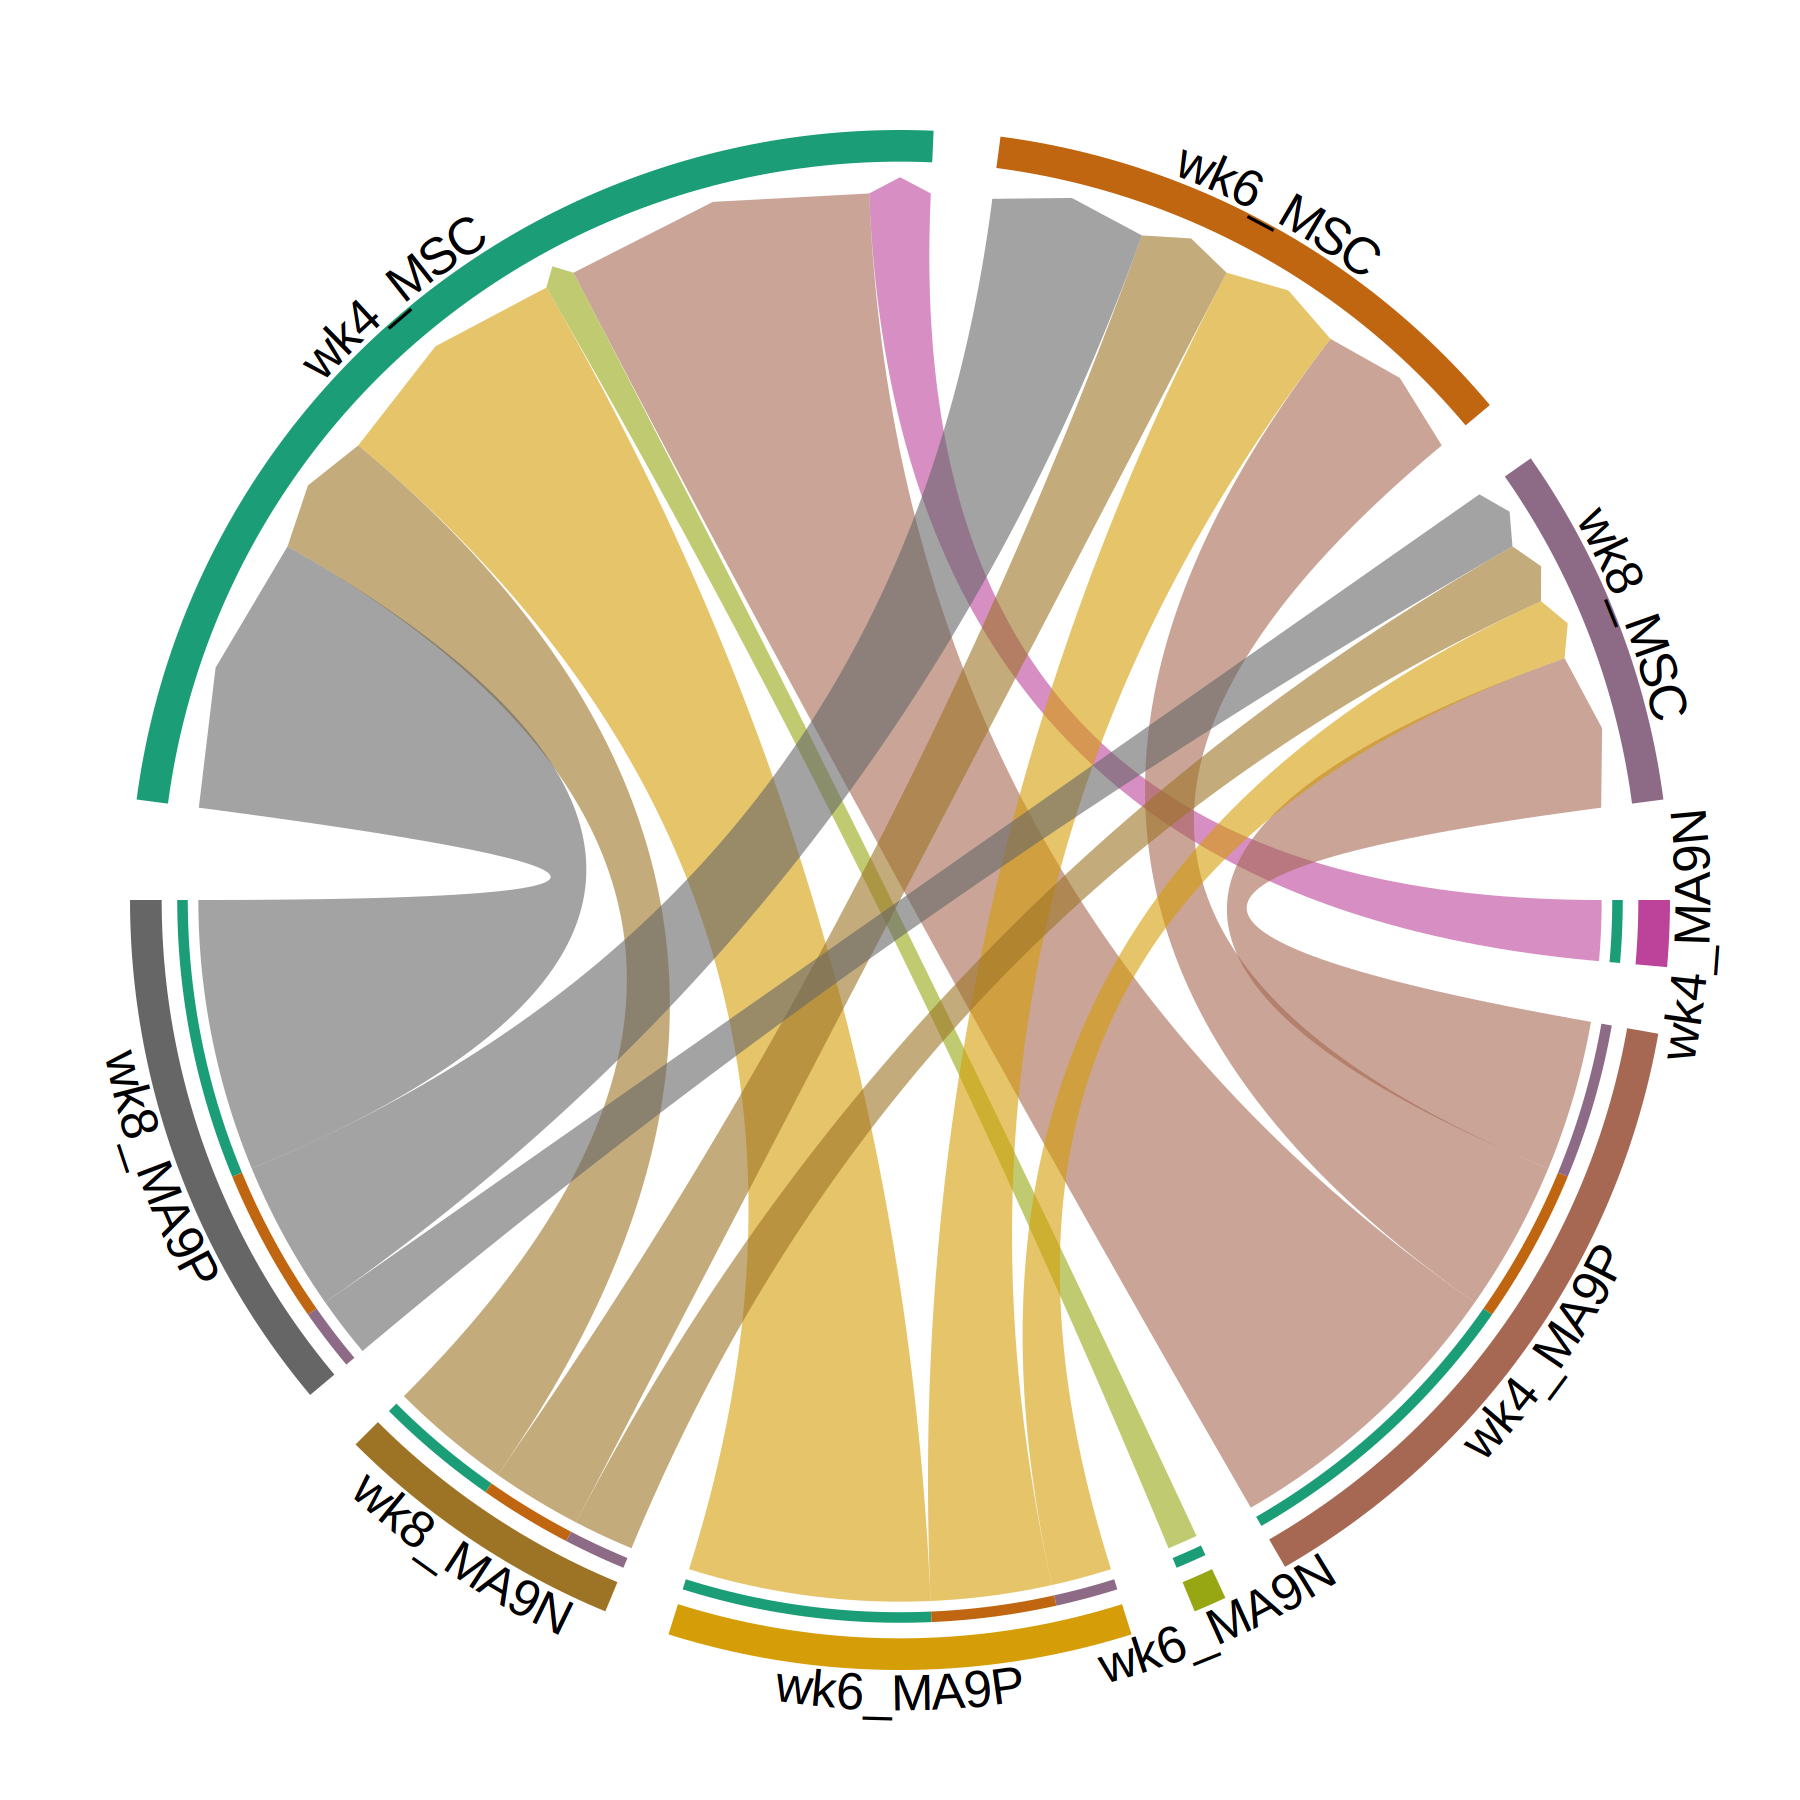

In [503]:
# MA9 model
liana_trunc <- liana_test %>%
   # only keep interactions concordant between methods
  filter(aggregate_rank <= 0.01) # note that these pvals are already corrected

source_groups = unique(liana_trunc$source[grepl('MSC', liana_trunc$source) & grepl('^MA9', liana_trunc$source)])
target_groups = unique(liana_trunc$target[!grepl('MSC', liana_trunc$target) & grepl('^MA9', liana_trunc$target)])
liana_trunc$source = sub('MA9_', '', liana_trunc$source) 
liana_trunc$target = sub('MA9_', '', liana_trunc$target) 
source_groups = sub('MA9_', '', source_groups)
target_groups = sub('MA9_', '', target_groups)

a = source_groups
source_groups = target_groups
target_groups = a

options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 300)
p <- chord_freq(liana_trunc, source_groups = source_groups, target_groups = target_groups, adj = c(.5, 2.1), cex = 1, facing = 'bending.outside')


Note: 7 points are out of plotting region in sector 'wk4_MSC', track '1'.

Note: 7 points are out of plotting region in sector 'wk6_MSC', track '1'.

Note: 7 points are out of plotting region in sector 'wk8_MSC', track '1'.

Note: 8 points are out of plotting region in sector 'wk4_MA9N', track '1'.

Note: 8 points are out of plotting region in sector 'wk6_MA9N', track '1'.

Note: 8 points are out of plotting region in sector 'wk8_MA9N', track '1'.



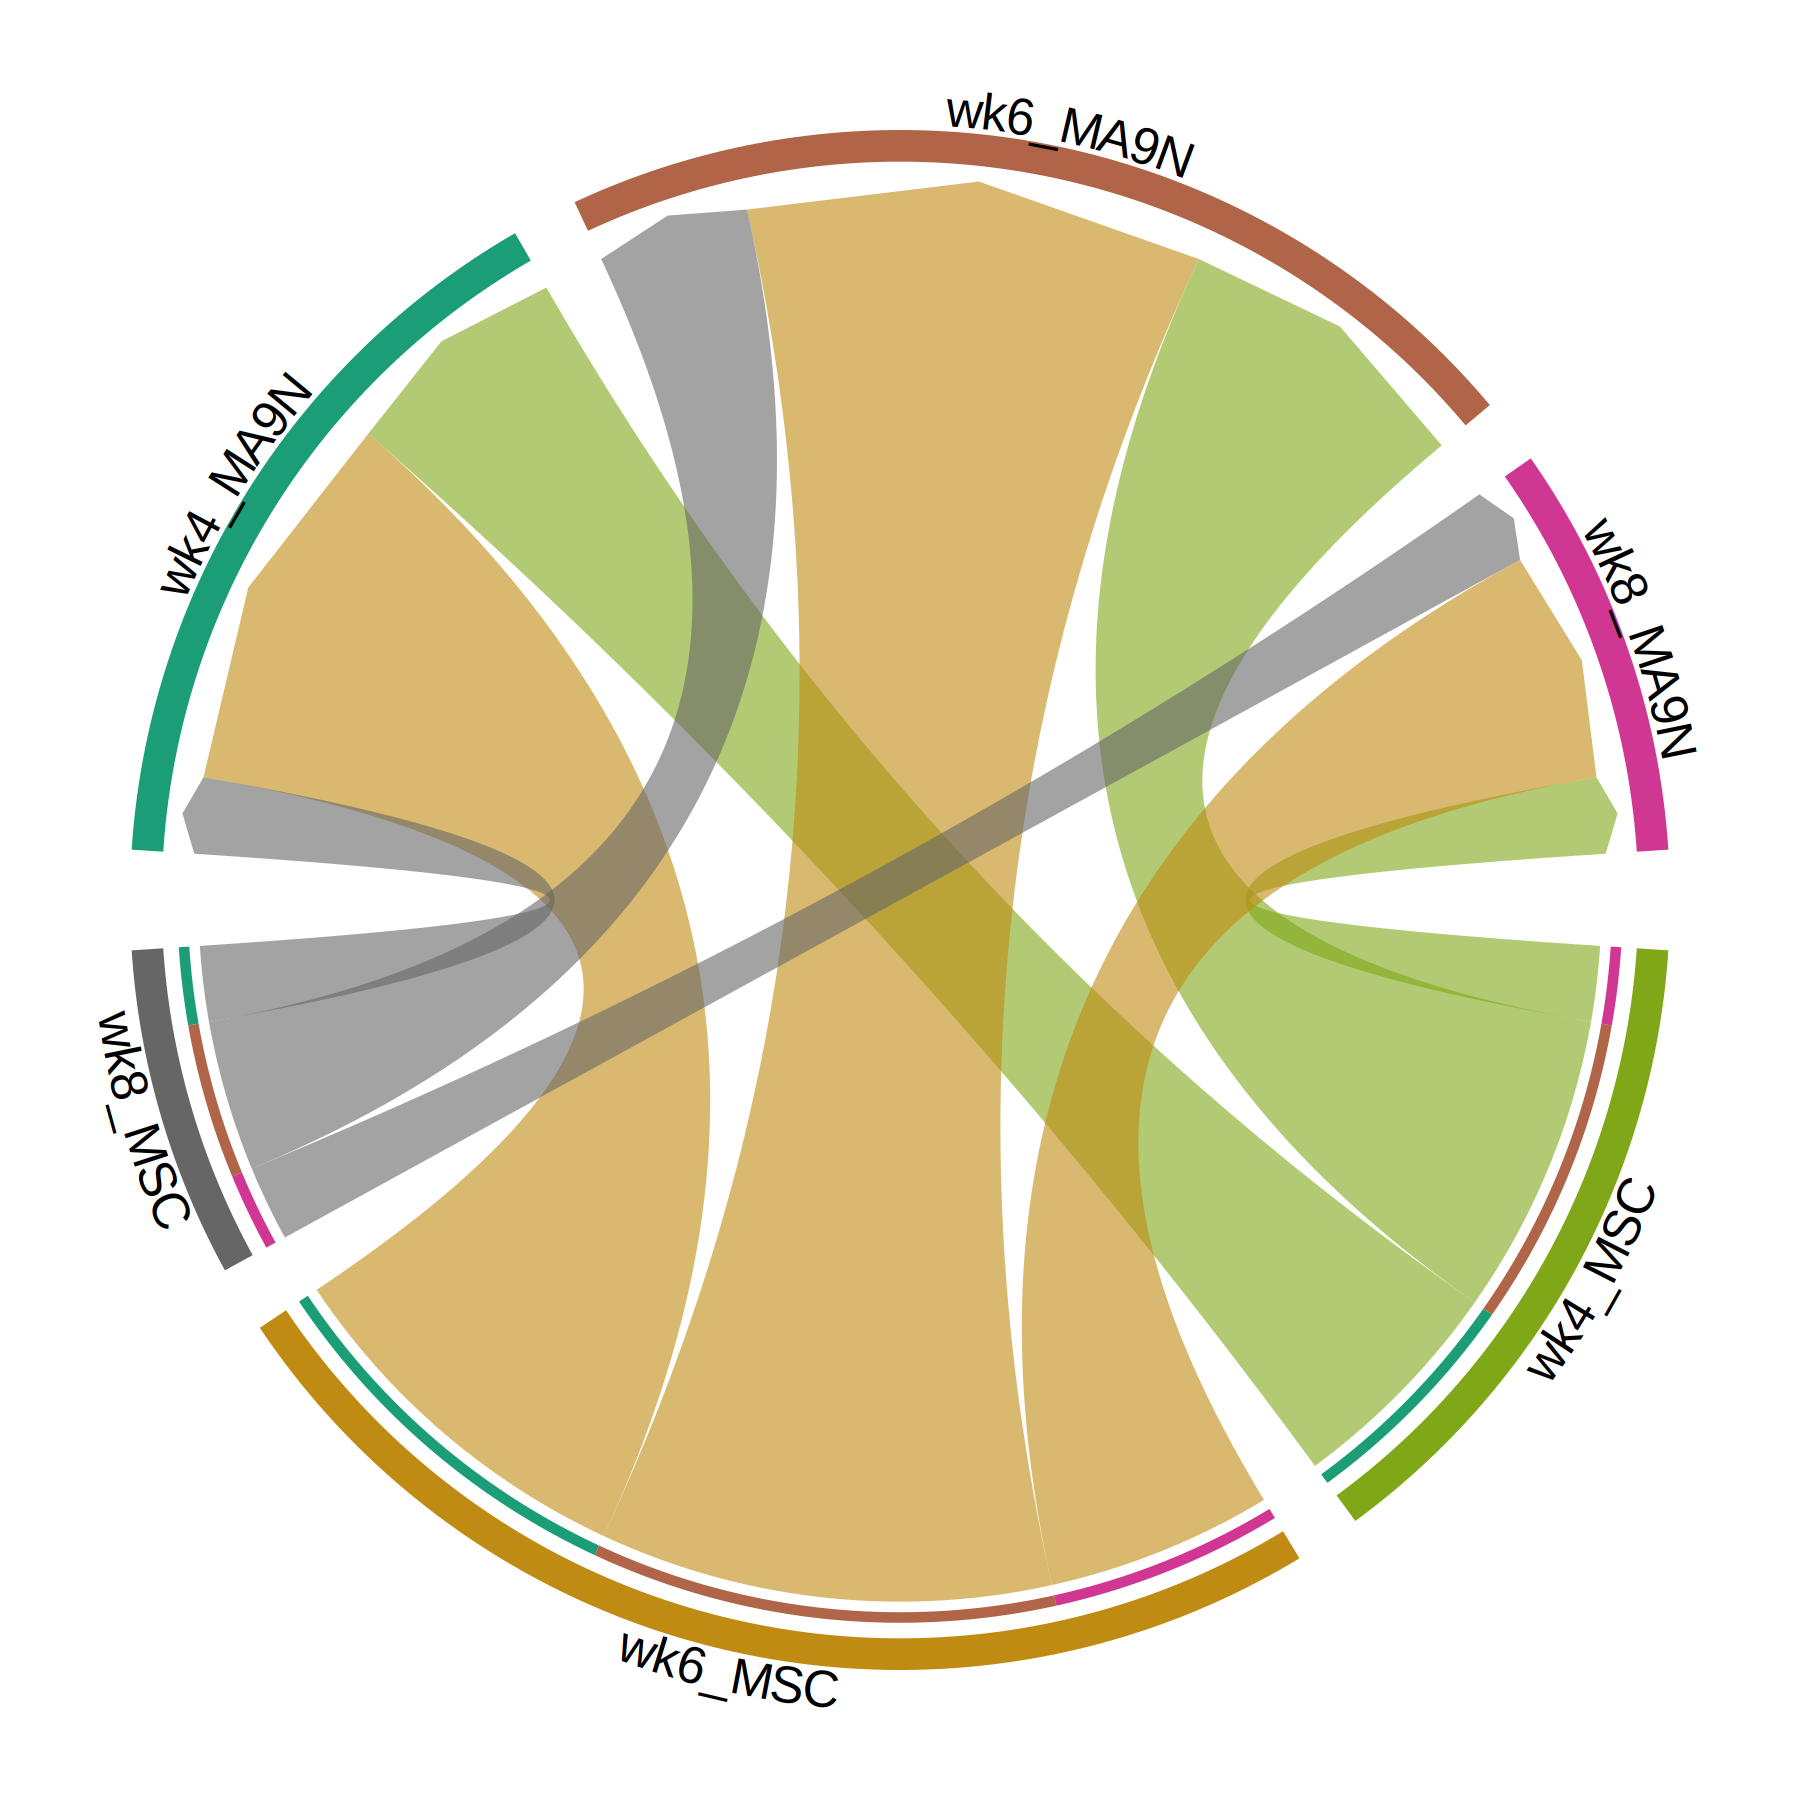

In [505]:
# Ctrl model
liana_trunc <- liana_test %>%
   # only keep interactions concordant between methods
  filter(aggregate_rank <= 0.01) # note that these pvals are already corrected

source_groups = unique(liana_trunc$source[grepl('MSC', liana_trunc$source) & grepl('^Ctrl', liana_trunc$source)])
target_groups = unique(liana_trunc$target[!grepl('MSC', liana_trunc$target) & grepl('^Ctrl', liana_trunc$target)])
liana_trunc$source = sub('Ctrl_', '', liana_trunc$source) 
liana_trunc$target = sub('Ctrl_', '', liana_trunc$target) 
source_groups = sub('Ctrl_', '', source_groups)
target_groups = sub('Ctrl_', '', target_groups)

options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 300)
p <- chord_freq(liana_trunc, source_groups = source_groups, target_groups = target_groups, adj = c(.5, 2.1), cex = 1, facing = 'bending.outside')


## plot detailed heatmap

In [511]:
#plotdat = dcast(interaction ~ st_ctype, data = plotdat, value.var = 'specificity_rank_invert', fill = 0.0001)
#plotdat = dcast(interaction ~ st_ctype, data = plotdat, value.var = 'magnitude_rank_invert', fill = 0.0001)

liana_test_dt = as.data.table(liana_test)
liana_test_dt[, interaction := paste0(ligand.complex, ' -> ', receptor.complex)]
liana_test_dt[, log_aggregate_rank := -log10(aggregate_rank + 0.00001)]

liana_test_dt[, source_model      := unlist(strsplit(source, '_'))[1], by = 1:nrow(liana_test_dt) ] 
liana_test_dt[, source_cell_type  := unlist(strsplit(source, '_'))[3], by = 1:nrow(liana_test_dt) ] 
liana_test_dt[, source_time_point := unlist(strsplit(source, '_'))[2], by = 1:nrow(liana_test_dt) ] 

liana_test_dt[, target_model      := unlist(strsplit(target, '_'))[1], by = 1:nrow(liana_test_dt) ] 
liana_test_dt[, target_cell_type  := unlist(strsplit(target, '_'))[3], by = 1:nrow(liana_test_dt) ] 
liana_test_dt[, target_time_point := unlist(strsplit(target, '_'))[2], by = 1:nrow(liana_test_dt) ] 

dim(liana_test_dt)
head(liana_test_dt)


[1] 40813    24

source       target       ligand.complex receptor.complex aggregate_rank mean_rank natmi.edge_specificity natmi.rank connectome.weight_sc connectome.rank ⋯ cellphonedb.pvalue
1 MA9_wk8_MSC  MA9_wk4_MSC  Dcn            Egfr             1.194677e-08   3143.8    0.07026601              157       2.962703             1               ⋯ 0                 
2 MA9_wk8_MSC  Ctrl_wk8_MSC Dcn            Egfr             1.494268e-08   3148.0    0.06933651              165       2.943302             2               ⋯ 0                 
3 MA9_wk8_MSC  Ctrl_wk6_MSC Dcn            Egfr             1.676454e-07   3202.6    0.05951402              266       2.738279             4               ⋯ 0                 
4 Ctrl_wk6_MSC MA9_wk4_MSC  Tnc            Egfr             2.516231e-07   3292.2    0.04071231             1012       2.715162             5               ⋯ 0                 
5 MA9_wk6_MSC  Ctrl_wk8_MSC Sparc          Fgfr1            2.780692e-07   3247.8    0.05181153              420       2.837040             3               ⋯ 0                 
6 Ctrl_wk6_MSC Ctrl_wk8_MSC Tnc            Egfr             3.219596e-07   3306.8    0.04017376             1072       2.695761             7               ⋯ 0                 
  cellphonedb.rank interaction    log_aggregate_rank source_model source_cell_type source_time_point target_model target_cell_type target_time_point
1 15369            Dcn -> Egfr    4.999481           MA9          MSC              wk8               MA9          MSC              wk4              
2 15369            Dcn -> Egfr    4.999352           MA9          MSC              wk8               Ctrl         MSC              wk8              
3 15369            Dcn -> Egfr    4.992780           MA9          MSC              wk8               Ctrl         MSC              wk6              
4 15369            Tnc -> Egfr    4.989207           Ctrl         MSC              wk6               MA9          MSC              wk4              
5 15369            Sparc -> Fgfr1 4.988088           MA9          MSC              wk6               Ctrl         MSC              wk8              
6 15369            Tnc -> Egfr    4.986238           Ctrl         MSC              wk6               Ctrl         MSC              wk8

In [382]:
fwrite(liana_test_dt, file = 'data/liana_test_dt.tsv', sep = '\t')


In [383]:
file.exists('data/liana_test_dt.tsv')

[1] TRUE

In [242]:
-log10(.05)

[1] 1.30103

In [340]:
ordered_names_msc_hsc = c('Ctrl__4__leiden_msc__leiden_ctr', 
                  'mode__4__leiden_msc__leiden_ctr', 
                  'mode__4__leiden_msc__leiden_ma9', 
                  'Ctrl__6__leiden_msc__leiden_ctr', 
                  'mode__6__leiden_msc__leiden_ctr', 
                  'mode__6__leiden_msc__leiden_ma9', 
                  'Ctrl__8__leiden_msc__leiden_ctr', 
                  'mode__8__leiden_msc__leiden_ma9') 

In [509]:
unique(c(liana_test_dt$source, liana_test_dt$target))

[1] "MA9_wk8_MSC"   "Ctrl_wk6_MSC"  "MA9_wk6_MSC"   "Ctrl_wk4_MSC"  "Ctrl_wk8_MSC"  "MA9_wk4_MSC"   "MA9_wk4_MA9P"  "MA9_wk8_MA9P"  "MA9_wk8_MA9N"  "MA9_wk6_MA9P"  "Ctrl_wk6_MA9N"
[12] "MA9_wk4_MA9N"  "Ctrl_wk8_MA9N" "MA9_wk6_MA9N"  "Ctrl_wk4_MA9N"

In [527]:
ordered_names_msc_hsc = c('Ctrl_wk4_MA9N', 'MA9_wk4_MA9N',  'MA9_wk4_MA9P',  'Ctrl_wk6_MA9N',  'MA9_wk6_MA9N', 
                          'MA9_wk6_MA9P',  'Ctrl_wk8_MA9N',  'MA9_wk8_MA9P') 
                          #'MA9_wk6_MA9P',  'Ctrl_wk8_MA9N',  'MA9_wk8_MA9N',  'MA9_wk8_MA9P') 


[1] 84  9

[1] 71  9

Warning message:
“`offset` is deprecated, use `location` instead.”
Warning message:
“`annotation_height` is set with length of one while with multiple annotations, `annotation_height` is treated as `height`.”
Warning message:
“`offset` is deprecated, use `location` instead.”


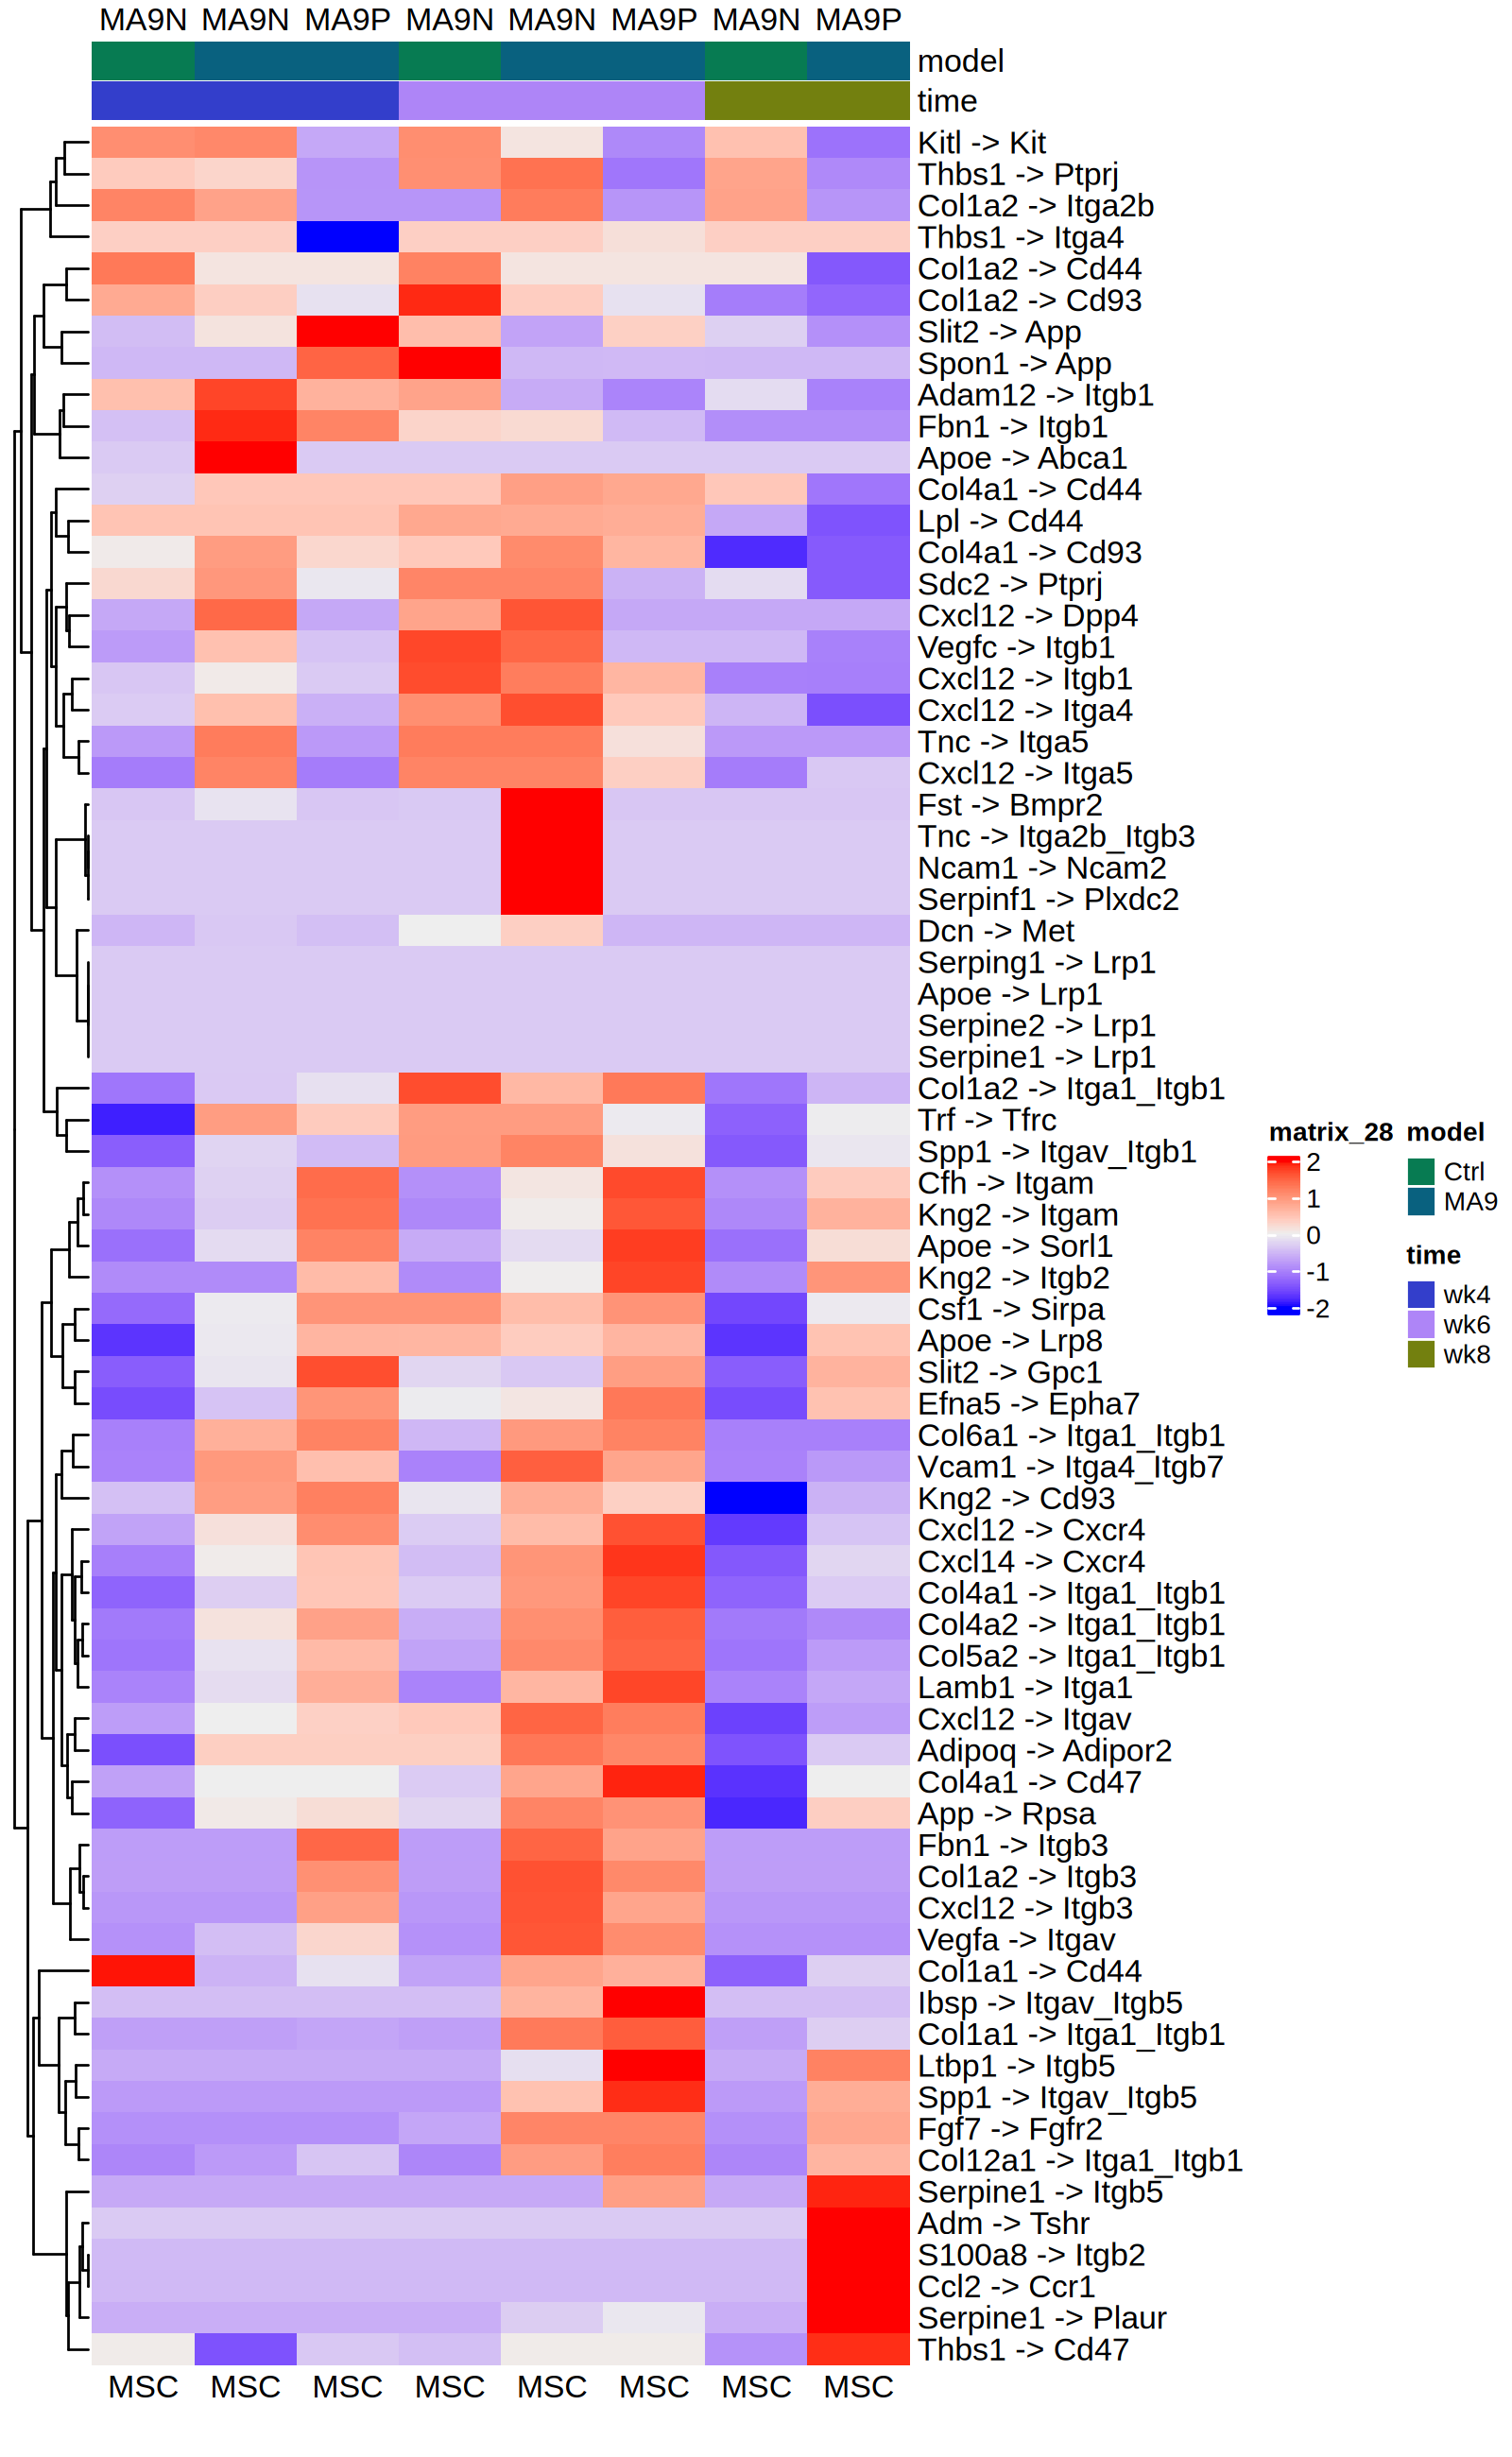

In [572]:
int_sel = liana_test_dt[log_aggregate_rank > -log10(0.01), interaction]
plotdat = liana_test_dt[source_cell_type == 'MSC' & target_cell_type %in% c('MA9P', 'MA9N') & source_time_point == target_time_point & source_model == target_model & interaction %in% int_sel, ]
plotdat[, cname := paste0(source_model, '_', source_time_point, '_', target_cell_type)]
dsn = copy(plotdat)
plotdat = dcast(interaction ~ cname, data = plotdat, value.var = 'log_aggregate_rank', fill = 0)
plotdat = as.matrix(setDF(plotdat[, 2:ncol(plotdat)], rownames = plotdat$interaction))
dim(plotdat)
rs = rowSds(plotdat)
plotdat = plotdat[rs > .1, ]
dim(plotdat)
plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2
plotdat = plotdat[, ordered_names_msc_hsc]

dsn2 = unique(dsn[, .(cname, source_model, source_time_point, target_cell_type)])
setnames(dsn2, c('cname', 'model', 'time', 'receiver'))
dsn2$sender = 'MSC'
dsn2 = setDF(dsn2[, 2:ncol(dsn2)], rownames = dsn2$cname)
dsn2 = dsn2[ordered_names_msc_hsc, ]
#col_ha = ComplexHeatmap::HeatmapAnnotation(df = dsn2[, c('model', 'time', 'receiver')], annotation_label = T)
col_ha = HeatmapAnnotation(df = dsn2[, c('model', 'time')], text = anno_text(dsn2$receiver, rot = 0, offset = unit(0.8, "npc"), just = "center"), annotation_height = 1.5*max_text_width(dsn2$sender))  
colnames(plotdat) = dsn2$sender
bot_ha = HeatmapAnnotation(text = anno_text(dsn2$sender, rot = 0, offset = unit(0.8, "npc"), just = "center"), annotation_height = max_text_width(dsn2$sender)) 

options(repr.plot.width = 8, repr.plot.height = 13, repr.plot.res = 200)
ComplexHeatmap::Heatmap(plotdat, cluster_columns = F, show_column_names = F, top_annotation = col_ha, bottom_annotation = bot_ha)


#options(repr.plot.width = 8, repr.plot.height = 18, repr.plot.res = 200)
#ComplexHeatmap::Heatmap(plotdat, cluster_columns = F, show_column_names = T)


In [534]:
ordered_names_hsc_msc = c('Ctrl_wk4_MA9N', 'MA9_wk4_MA9N', 'MA9_wk4_MA9P', 'Ctrl_wk6_MA9N', 'MA9_wk6_MA9N',
                          'MA9_wk6_MA9P', 'Ctrl_wk8_MA9N', 'MA9_wk8_MA9P')
                          #'MA9_wk6_MA9P', 'Ctrl_wk8_MA9N', 'MA9_wk8_MA9N', 'MA9_wk8_MA9P')


[1] 44  9

[1] 32  9

Warning message:
“`offset` is deprecated, use `location` instead.”
Warning message:
“`annotation_height` is set with length of one while with multiple annotations, `annotation_height` is treated as `height`.”
Warning message:
“`offset` is deprecated, use `location` instead.”


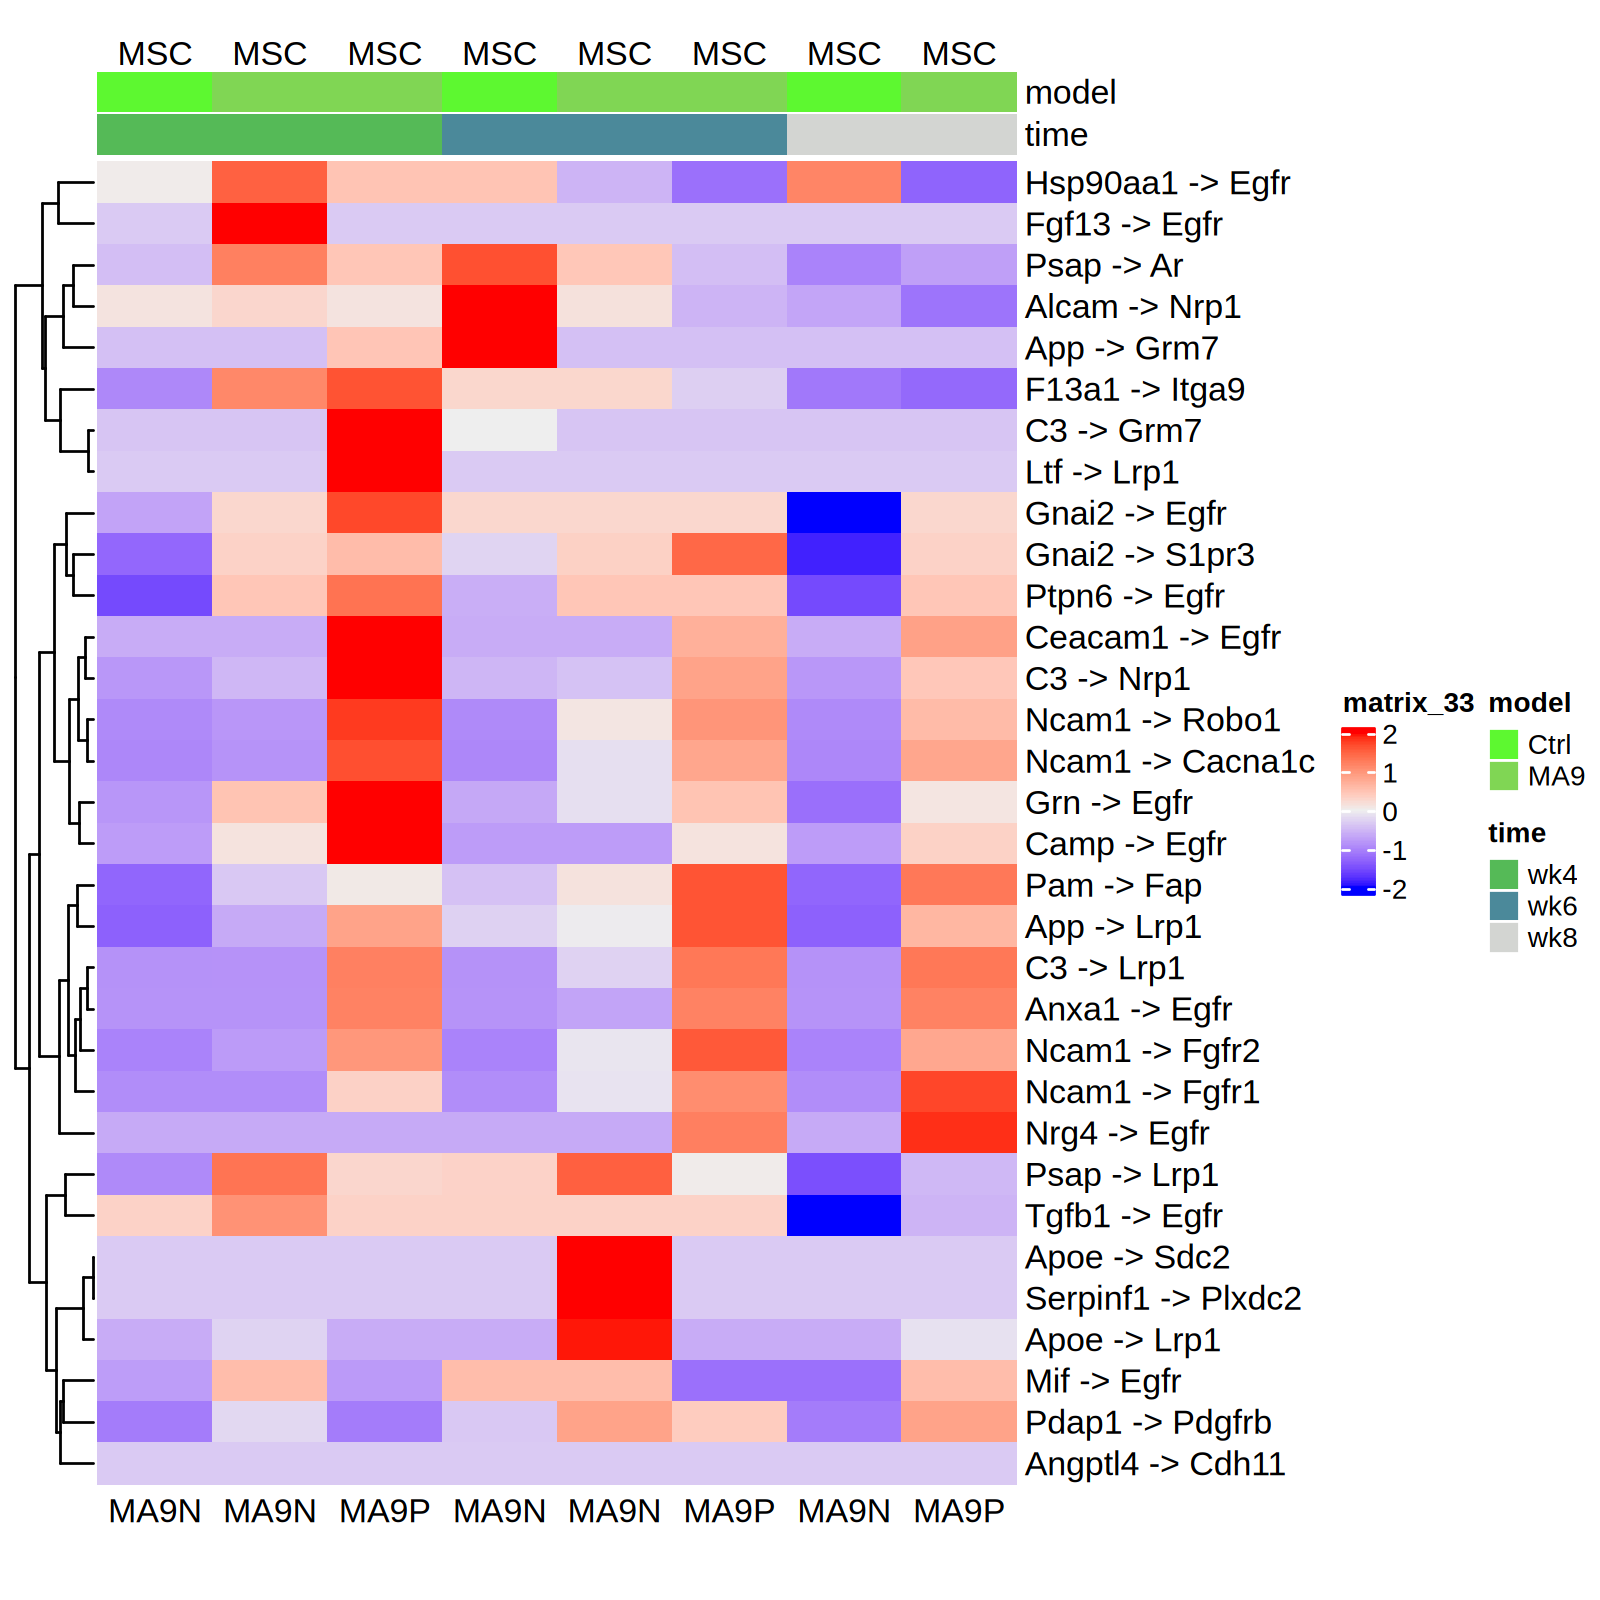

In [578]:
#liana_test_dt[, souce_id := paste0()] 
int_sel = liana_test_dt[log_aggregate_rank > -log10(0.01), interaction]
plotdat = liana_test_dt[source_cell_type %in% c('MA9P', 'MA9N') & target_cell_type == 'MSC' & source_time_point == target_time_point & source_model == target_model & interaction %in% int_sel, ]
plotdat[, cname := paste0(source_model, '_', source_time_point, '_', source_cell_type)]
dsn = copy(plotdat)
plotdat = dcast(interaction ~ cname, data = plotdat, value.var = 'log_aggregate_rank', fill = 0)
plotdat = as.matrix(setDF(plotdat[, 2:ncol(plotdat)], rownames = plotdat$interaction))
dim(plotdat)
rs = rowSds(plotdat)
plotdat = plotdat[rs > .1, ]
dim(plotdat)
plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2
plotdat = plotdat[, ordered_names_hsc_msc]

dsn2 = unique(dsn[, .(cname, source_model, source_time_point, source_cell_type)])
setnames(dsn2, c('cname', 'model', 'time', 'sender'))
dsn2$receiver = 'MSC'
dsn2 = setDF(dsn2[, 2:ncol(dsn2)], rownames = dsn2$cname)
dsn2 = dsn2[ordered_names_hsc_msc, ]
#col_ha = ComplexHeatmap::HeatmapAnnotation(df = dsn2[, c('model', 'time', 'receiver')], annotation_label = T)
col_ha = HeatmapAnnotation(df = dsn2[, c('model', 'time')], text = anno_text(dsn2$receiver, rot = 0, offset = unit(0.3, "npc"), just = "center"), annotation_height = 1.5*max_text_width(dsn2$sender))  
colnames(plotdat) = dsn2$sender
bot_ha = HeatmapAnnotation(text = anno_text(dsn2$sender, rot = 0, offset = unit(0.8, "npc"), just = "center"), annotation_height = max_text_width(dsn2$sender)) 

options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 200)
ComplexHeatmap::Heatmap(plotdat, cluster_columns = F, show_column_names = F, top_annotation = col_ha, bottom_annotation = bot_ha)



# run liana for a single algorithm


In [ ]:
# need to convert mouse gene to human gene
ccc_rna$label = ccc_rna$ccc_group1
cpdb_test <- liana_wrap(ccc_rna, method = 'cellphonedb', resource = c('CellPhoneDB'),
                        permutation.params = list(nperms=100, parallelize=FALSE, workers=4),
                        expr_prop=0.05)


In [ ]:
# identify interactions of interest
cpdb_int <- cpdb_test %>%
  # only keep interactions with p-val <= 0.05
  filter(pvalue <= 0.05) %>% # this reflects interactions `specificity`
  # then rank according to `magnitude` (lr_mean in this case)
  rank_method(method_name = "cellphonedb",
              mode = "magnitude") %>%
  # keep top 20 interactions (regardless of cell type)
  distinct_at(c("ligand.complex", "receptor.complex")) %>%
  head(20)



# Plot toy results
cpdb_test %>%
  # keep only the interactions of interest
  inner_join(cpdb_int, 
             by = c("ligand.complex", "receptor.complex")) %>%
  # invert size (low p-value/high specificity = larger dot size)
  # + add a small value to avoid Infinity for 0s
  mutate(pvalue = -log10(pvalue + 1e-10)) %>% 
  liana_dotplot(source_groups = c("c"),
                target_groups = c("c", "a", "b"),
                specificity = "pvalue",
                magnitude = "lr.mean",
                show_complex = TRUE,
                size.label = "-log10(p-value)")

In [357]:
saveRDS(liana_test, file = 'data/liana_test_nb_ccc_liana_R.rds')

# run liana aggregate with MSC sub clusters

In [ ]:
liana_test_kl <- liana_wrap(ccc_rna, idents_col = 'ccc_group2',  resource = 'MouseConsensus',  permutation.params = list(nperms = 2))
liana_test_kl <- liana_test_kl %>% liana_aggregate()


Expression from the `RNA` assay will be used

Running LIANA with `ccc_group2` as labels!

`Idents` were converted to factor

Cell identities with less than 5 cells: Ctrl_MSC_wk4__MSC__4 were removed!Cell identities with less than 5 cells: Ctrl_MSC_wk6__MSC__7 were removed!Cell identities with less than 5 cells: MA9_MSC_wk4__MSC__1 were removed!Cell identities with less than 5 cells: MA9_MSC_wk4__MSC__7 were removed!Cell identities with less than 5 cells: MA9_MSC_wk6__MSC__2 were removed!Cell identities with less than 5 cells: MA9_MSC_wk6__MSC__3 were removed!Cell identities with less than 5 cells: MA9_MSC_wk8__MSC__1 were removed!Cell identities with less than 5 cells: MA9_MSC_wk8__MSC__5 were removed!

Warning message in exec(output, ...):
“883 genes and/or 0 cells were removed as they had no counts!”
LIANA: LR summary stats calculated!

Now Running: Natmi

Now Running: Connectome

Now Running: Logfc

Now Running: Sca

Now Running: Cellphonedb



In [ ]:
saveRDS(liana_test_kl, file = 'data/liana_test_kl_Jul30.rds')

# plot 2nd run with MSC subtypes

## rename cell population

Ctrl_MSC_wk8__MSC__4 MA9_MSC_wk8__MSC__HSC Ctrl_MSC_wk6__MSC__4 Ctrl_HSC_wk4__MA9N__HSC Ctrl_HSC_wk6__MA9N__HSC Ctrl_HSC_wk8__MA9N__HSC Ctrl_MSC_wk4__MSC__1
Ctrl_HSC_wk4__MA9N__HSC  1                    1                     0                   0                       0                       0                        0                  
Ctrl_HSC_wk6__MA9N__HSC  3                    1                     2                   0                       0                       0                        0                  
Ctrl_MSC_wk4__MSC__1    13                    6                    20                   2                       1                       1                        4                  
Ctrl_MSC_wk4__MSC__2    10                    4                    15                   2                       2                       1                        3                  
Ctrl_MSC_wk4__MSC__3    19                    6                    25                   3                       4                       2                        5                  
Ctrl_MSC_wk4__MSC__HSC  23                   12                    25                   5                       7                       4                       18                  
                        Ctrl_MSC_wk4__MSC__2 Ctrl_MSC_wk4__MSC__3 Ctrl_MSC_wk4__MSC__HSC ⋯ MA9_MSC_wk6__MSC__4 MA9_MSC_wk6__MSC__5 MA9_MSC_wk6__MSC__6 MA9_MSC_wk6__MSC__HSC
Ctrl_HSC_wk4__MA9N__HSC  0                    0                    0                     ⋯  0                   0                   0                   0                   
Ctrl_HSC_wk6__MA9N__HSC  0                    0                    0                     ⋯  0                   0                   0                   0                   
Ctrl_MSC_wk4__MSC__1     1                    8                    1                     ⋯  7                  11                  11                  14                   
Ctrl_MSC_wk4__MSC__2     2                    3                    4                     ⋯  4                   9                   7                   9                   
Ctrl_MSC_wk4__MSC__3     4                    8                    5                     ⋯  9                  14                   9                  12                   
Ctrl_MSC_wk4__MSC__HSC  13                   15                   13                     ⋯ 17                  22                  18                  22                   
                        MA9_MSC_wk8__MSC__4 MA9_MSC_wk8__MSC__6 MA9_MSC_wk8__MSC__7 MA9_HSC_wk4__MA9P__HSC MA9_HSC_wk8__MA9P__HSC MA9_MSC_wk4__MSC__2
Ctrl_HSC_wk4__MA9N__HSC  0                   0                   0                   0                     0                      0                  
Ctrl_HSC_wk6__MA9N__HSC  0                   0                   0                   0                     0                      0                  
Ctrl_MSC_wk4__MSC__1    10                  11                   7                   0                     0                      0                  
Ctrl_MSC_wk4__MSC__2     7                   8                   4                   1                     0                      0                  
Ctrl_MSC_wk4__MSC__3    12                  15                   5                   3                     1                      0                  
Ctrl_MSC_wk4__MSC__HSC  18                  23                  14                  10                     8                      5

[1] 36 37

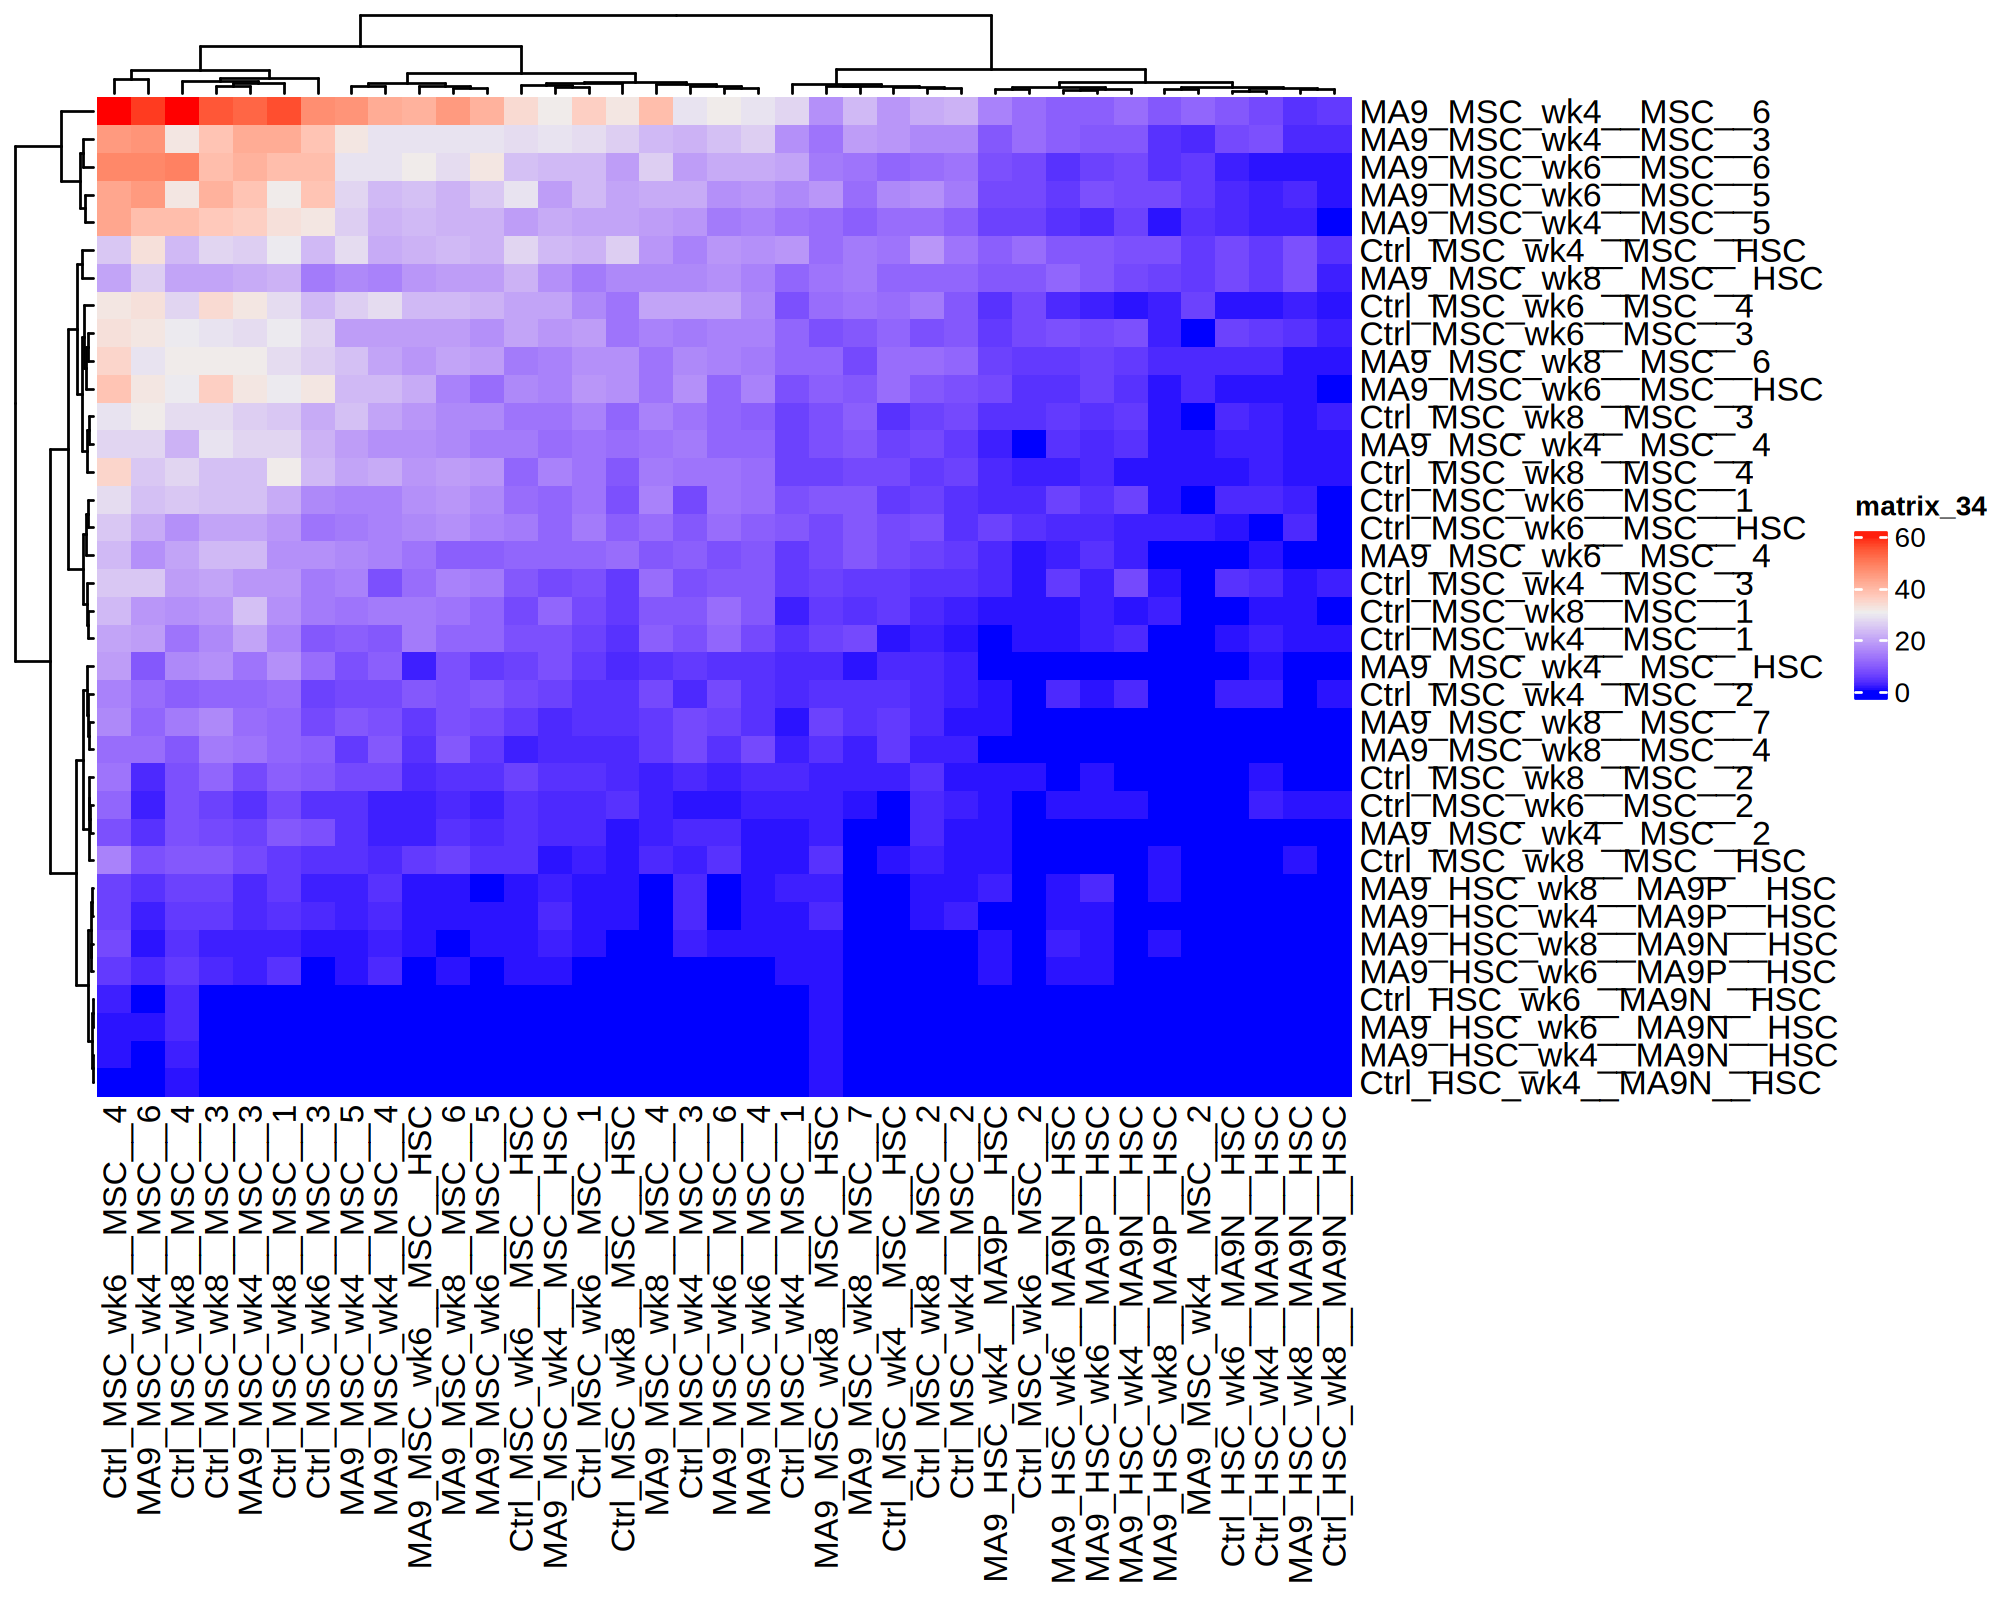

In [582]:
liana_trunc <- liana_test_kl %>%
   # only keep interactions concordant between methods
  filter(aggregate_rank <= 0.01) # note that these pvals are already corrected
freqs <- liana_trunc %>% liana:::.get_freq()
head(freqs)
dim(freqs)

options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res = 200)
ComplexHeatmap::Heatmap(freqs)


# export

In [584]:
saveRDS(ccc_rna, file = 'nb_ccc_liana_R_Jul30__ccc_rna.rdata')
saveRDS(liana_test_kl, file = 'nb_ccc_liana_R_Jul30__liana_test_kl.rdata')
saveRDS(liana_test, file = 'nb_ccc_liana_R_Jul30__liana_test.rdata')

In [196]:
liana_res = fread('data/liana_res_jun18.csv')
liana_kl_res = fread('data/liana_res_kl_jun18.csv')

In [204]:
liana_test_dt = as.data.table(liana_res)
liana_test_dt[, interaction := paste0(ligand_complex, ' -> ', receptor_complex)]
liana_test_dt[, log_aggregate_rank := -log10(magnitude_rank)]

liana_test_dt[, source_model      := unlist(strsplit(source, '__'))[1], by = 1:nrow(liana_test_dt) ] 
liana_test_dt[, source_cell_type  := unlist(strsplit(source, '__'))[2], by = 1:nrow(liana_test_dt)  ] 
liana_test_dt[, source_time_point := unlist(strsplit(source, '__'))[3], by = 1:nrow(liana_test_dt)  ] 
liana_test_dt[, source_leiden     := unlist(strsplit(source, '__'))[4], by = 1:nrow(liana_test_dt)  ] 

liana_test_dt[, target_model      := unlist(strsplit(target, '__'))[1], by = 1:nrow(liana_test_dt)  ] 
liana_test_dt[, target_cell_type  := unlist(strsplit(target, '__'))[2], by = 1:nrow(liana_test_dt)  ] 
liana_test_dt[, target_time_point := unlist(strsplit(target, '__'))[3], by = 1:nrow(liana_test_dt)  ] 
liana_test_dt[, target_leiden     := unlist(strsplit(target, '__'))[4], by = 1:nrow(liana_test_dt)  ] 

dim(liana_test_dt)
head(liana_test_dt)



[1] 40937    26

V1    source                    target                    ligand_complex
1 26412 Ctrl__MSC__6__leiden_msc  model__HSC__8__leiden_ctr App           
2 28998 Ctrl__MSC__6__leiden_msc  model__HSC__8__leiden_ma9 App           
3 27739 model__MSC__4__leiden_msc model__HSC__8__leiden_ctr App           
4 26694 Ctrl__MSC__8__leiden_msc  model__HSC__8__leiden_ctr App           
5 20944 Ctrl__MSC__6__leiden_msc  model__HSC__6__leiden_ctr Cxcl12        
6 22792 model__MSC__6__leiden_msc model__HSC__6__leiden_ctr Cxcl12        
  receptor_complex lr_means cellphone_pvals expr_prod scaled_weight lr_logfc ⋯
1 Rpsa             3.024209 0               8.293002  1.1243389     1.267102 ⋯
2 Rpsa             2.978213 0               8.099751  1.0812719     1.471269 ⋯
3 Rpsa             2.917782 0               7.452715  1.0107851     1.121668 ⋯
4 Rpsa             2.887163 0               7.210963  0.9781146     1.044067 ⋯
5 Itga4            2.985397 0               6.765145  1.8484428     2.362476 ⋯
6 Itga4            2.977011 0               6.739651  1.8420802     2.179843 ⋯
  interaction     log_aggregate_rank source_model source_cell_type
1 App -> Rpsa     12.122461          Ctrl         MSC             
2 App -> Rpsa     11.200888          Ctrl         MSC             
3 App -> Rpsa      9.632308          model        MSC             
4 App -> Rpsa      9.104074          Ctrl         MSC             
5 Cxcl12 -> Itga4  8.998400          Ctrl         MSC             
6 Cxcl12 -> Itga4  8.885046          model        MSC             
  source_time_point source_leiden target_model target_cell_type
1 6                 leiden_msc    model        HSC             
2 6                 leiden_msc    model        HSC             
3 4                 leiden_msc    model        HSC             
4 8                 leiden_msc    model        HSC             
5 6                 leiden_msc    model        HSC             
6 6                 leiden_msc    model        HSC             
  target_time_point target_leiden
1 8                 leiden_ctr   
2 8                 leiden_ma9   
3 8                 leiden_ctr   
4 8                 leiden_ctr   
5 6                 leiden_ctr   
6 6                 leiden_ctr

In [203]:
plotdat = liana_test_dt[source_cell_type == 'MSC' & target_cell_type == 'HSC' & source_time_point == target_time_point, ]
#plotdat = dcast(interaction ~ , data = , value.var = 'log_aggregate_rank')
dim(plotdat)
head(plotdat)


[1] 40937    26

V1    source                    target                    ligand_complex
1 26412 Ctrl__MSC__6__leiden_msc  model__HSC__8__leiden_ctr App           
2 28998 Ctrl__MSC__6__leiden_msc  model__HSC__8__leiden_ma9 App           
3 27739 model__MSC__4__leiden_msc model__HSC__8__leiden_ctr App           
4 26694 Ctrl__MSC__8__leiden_msc  model__HSC__8__leiden_ctr App           
5 20944 Ctrl__MSC__6__leiden_msc  model__HSC__6__leiden_ctr Cxcl12        
6 22792 model__MSC__6__leiden_msc model__HSC__6__leiden_ctr Cxcl12        
  receptor_complex lr_means cellphone_pvals expr_prod scaled_weight lr_logfc ⋯
1 Rpsa             3.024209 0               8.293002  1.1243389     1.267102 ⋯
2 Rpsa             2.978213 0               8.099751  1.0812719     1.471269 ⋯
3 Rpsa             2.917782 0               7.452715  1.0107851     1.121668 ⋯
4 Rpsa             2.887163 0               7.210963  0.9781146     1.044067 ⋯
5 Itga4            2.985397 0               6.765145  1.8484428     2.362476 ⋯
6 Itga4            2.977011 0               6.739651  1.8420802     2.179843 ⋯
  interaction     log_aggregate_rank source_model source_cell_type
1 App -> Rpsa     12.122461          Ctrl         MSC             
2 App -> Rpsa     11.200888          Ctrl         MSC             
3 App -> Rpsa      9.632308          Ctrl         MSC             
4 App -> Rpsa      9.104074          Ctrl         MSC             
5 Cxcl12 -> Itga4  8.998400          Ctrl         MSC             
6 Cxcl12 -> Itga4  8.885046          Ctrl         MSC             
  source_time_point source_leiden target_model target_cell_type
1 6                 leiden_msc    model        HSC             
2 6                 leiden_msc    model        HSC             
3 6                 leiden_msc    model        HSC             
4 6                 leiden_msc    model        HSC             
5 6                 leiden_msc    model        HSC             
6 6                 leiden_msc    model        HSC             
  target_time_point target_leiden
1 8                 leiden_ctr   
2 8                 leiden_ctr   
3 8                 leiden_ctr   
4 8                 leiden_ctr   
5 8                 leiden_ctr   
6 8                 leiden_ctr